In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("data/dataset_small.csv")

In [4]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [5]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


#### This data don't have any categorical columns 

# EDA

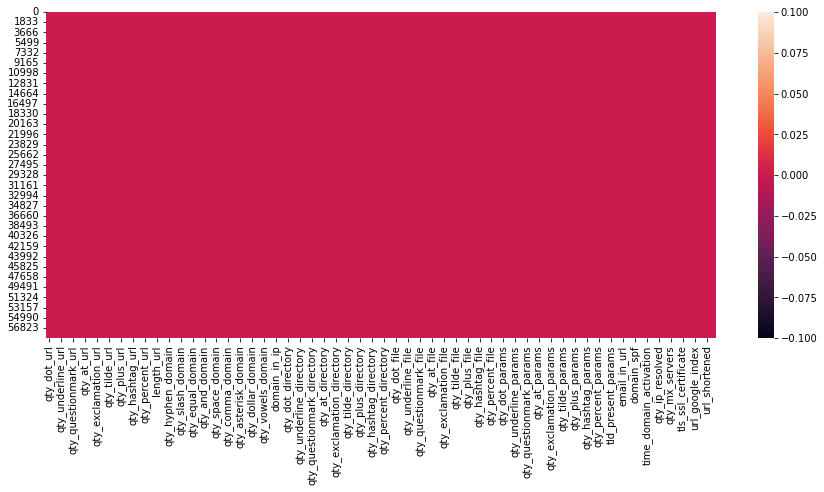

In [6]:
plt.subplots(figsize=(15,6))
sns.heatmap(df.isna());

#### we can not see all the columns here so let's try another way

In [7]:
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

**This is also not showing all rows so lets just run a for loop to check all the missing values**

In [8]:
nan_feat =  [feat for feat in df.columns if df[feat].isna().sum()>=1]
nan_feat

[]

### There is no null values

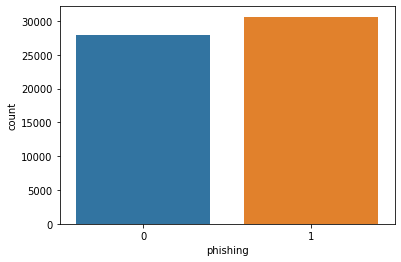

In [9]:
#Checking the count of output data

sns.countplot(x = "phishing", data = df);

#### This dataset is balanced dataset

## Data Description

After reading the whole discription of this dataset, I understand that the attributes of this dataset can be divided into six groups:
1. Based on URL ---- "https://example.com/examples/index.php?q=example&y=2020"
2. Domain URL -----  "example.com"
3. URL directory ---- "examples"
4. URL Filename ----  "index.php?"
5. URL parameters ---- "q=example&y=2020"
6. Resolving URL and external services --- This group is based on URL resolving metrics such as google search indexed



##### 1st Group based on URL

In [10]:
based_url = [feat for feat in df.columns if feat.split("_")[-1] == 'url']

In [11]:
df[based_url].head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,email_in_url
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,0
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,0


In [12]:
discrete_based = [feat for feat in based_url if df[feat].nunique()<35]

In [14]:
continous_based = [feat for feat in based_url if feat not in discrete_based]

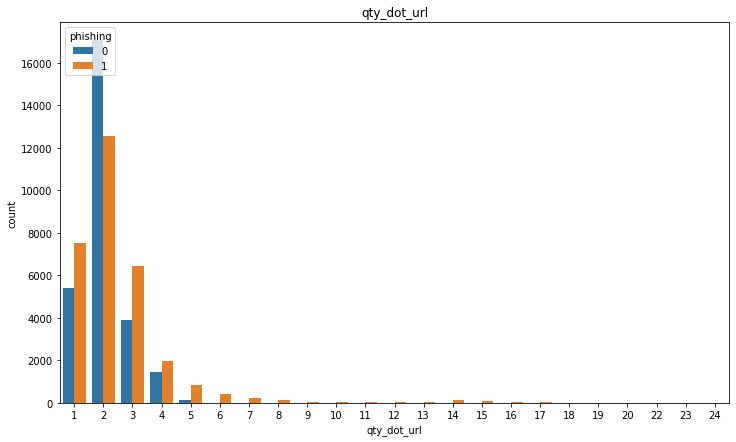

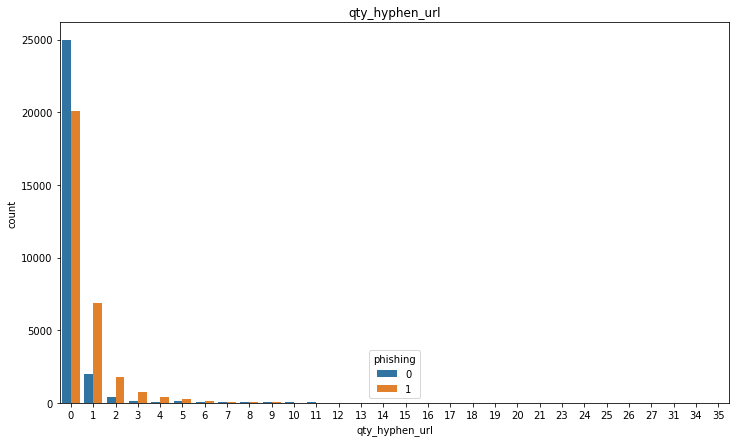

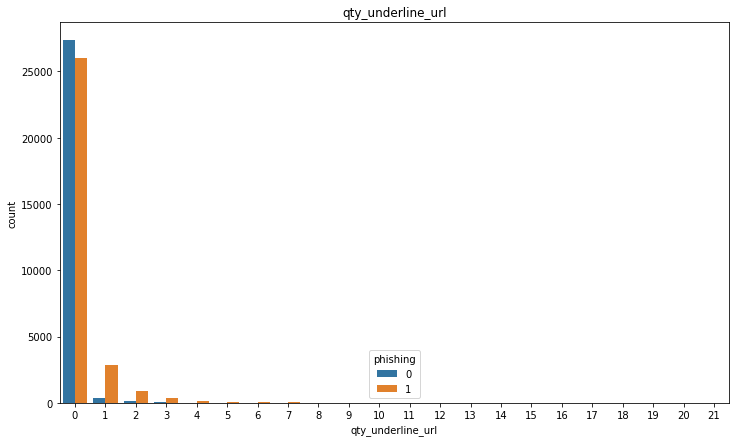

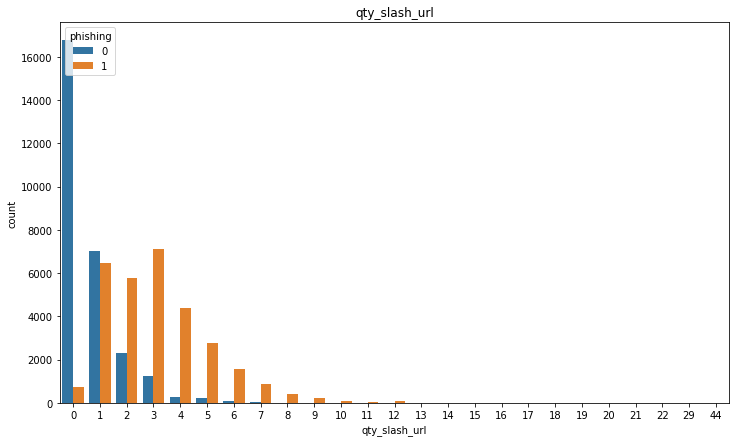

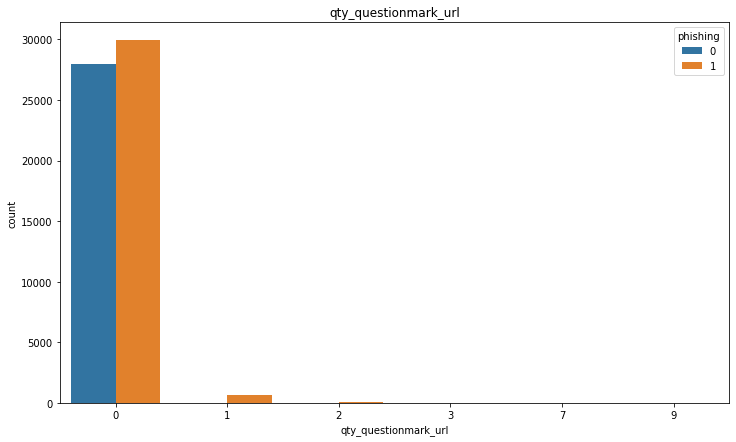

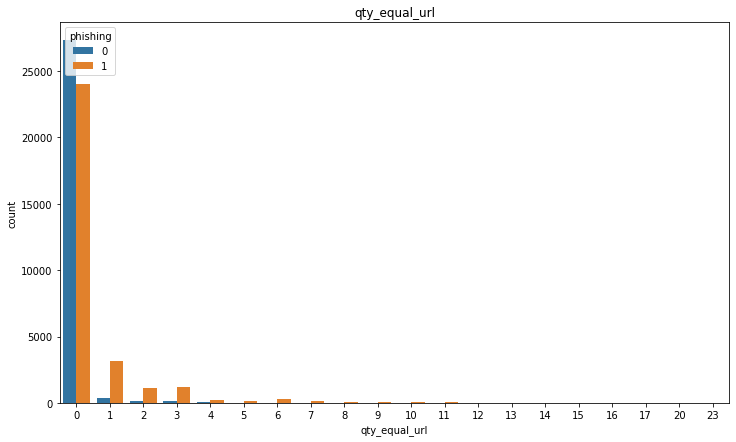

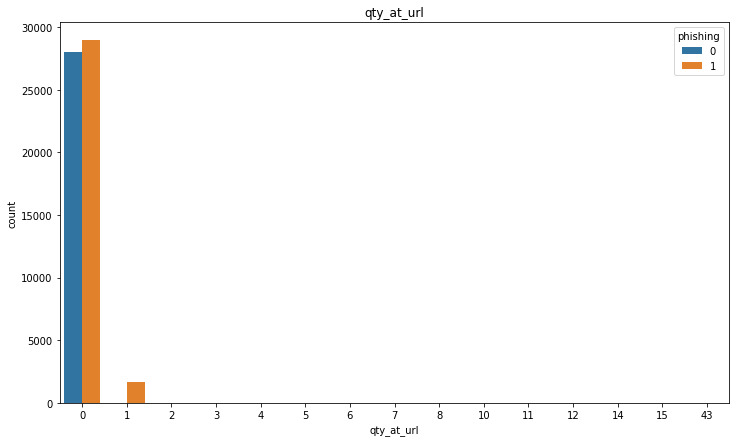

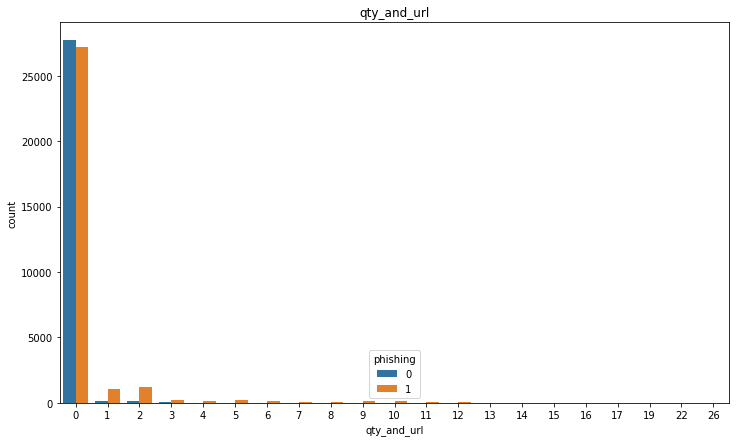

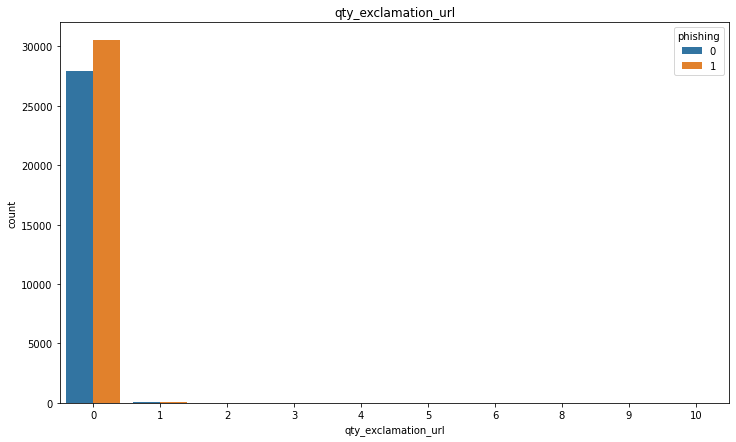

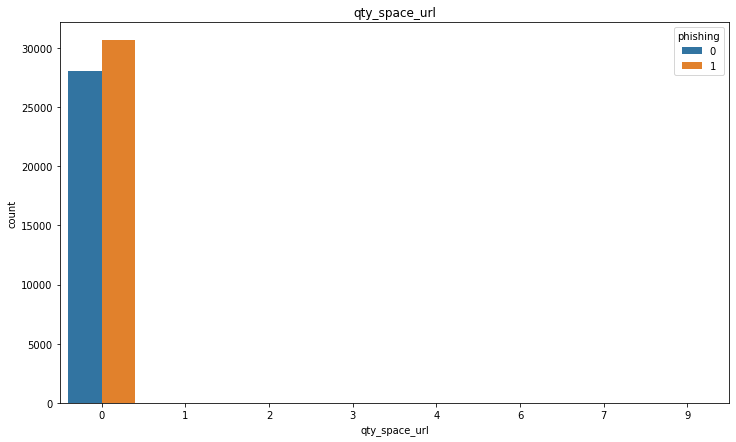

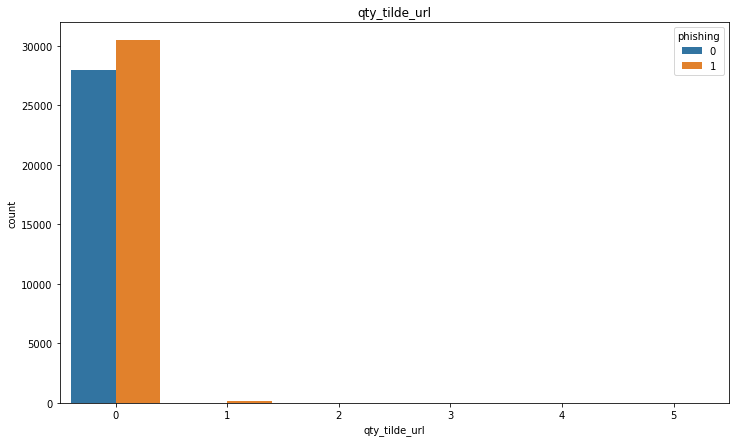

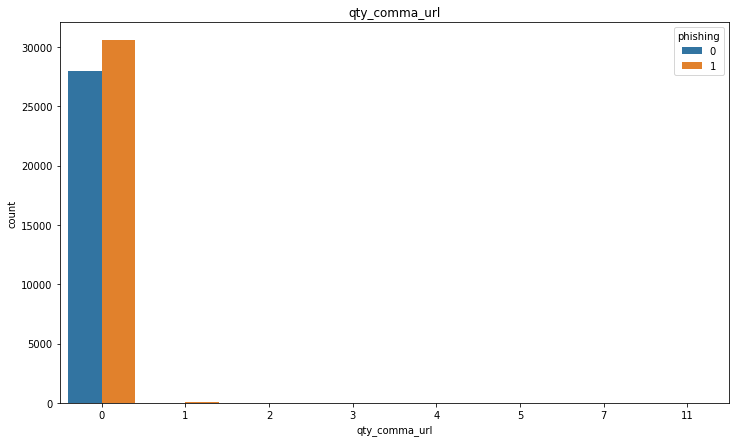

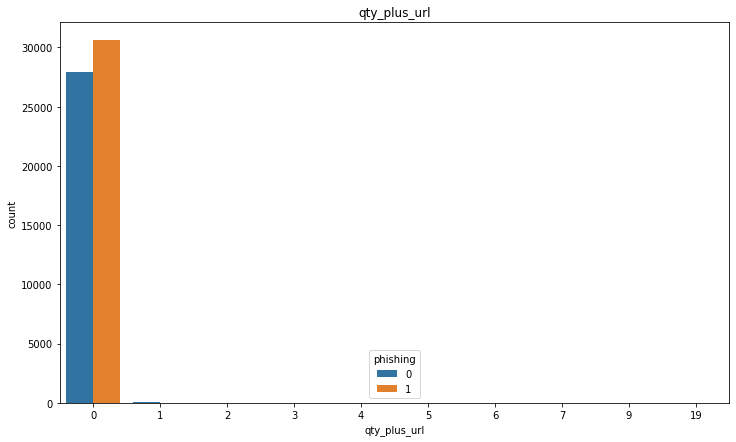

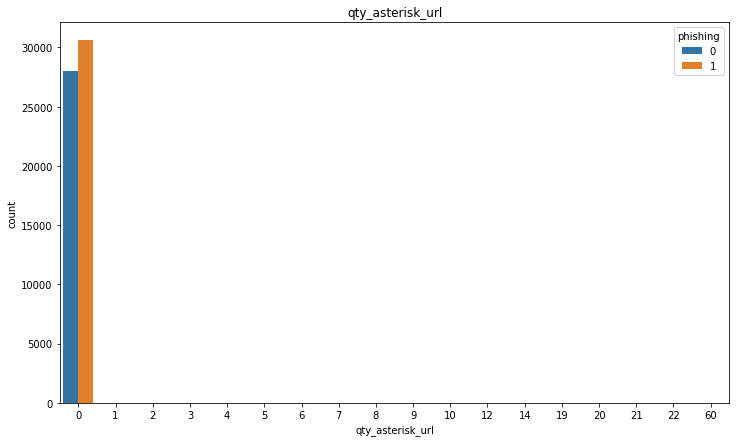

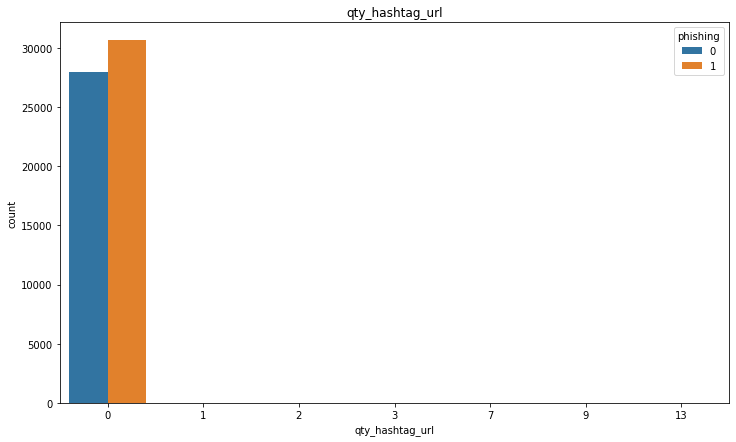

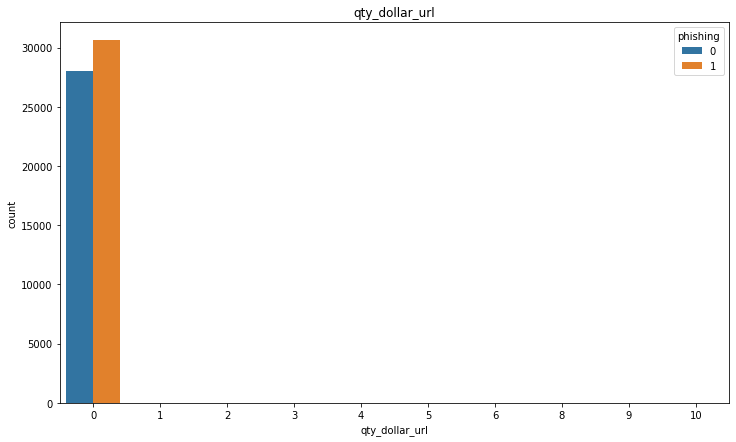

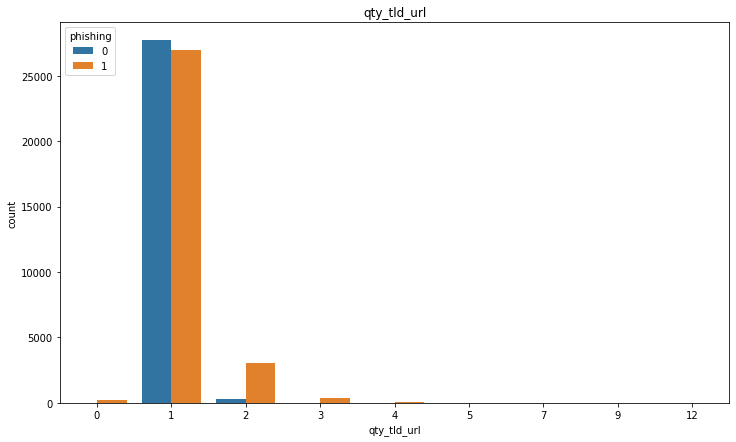

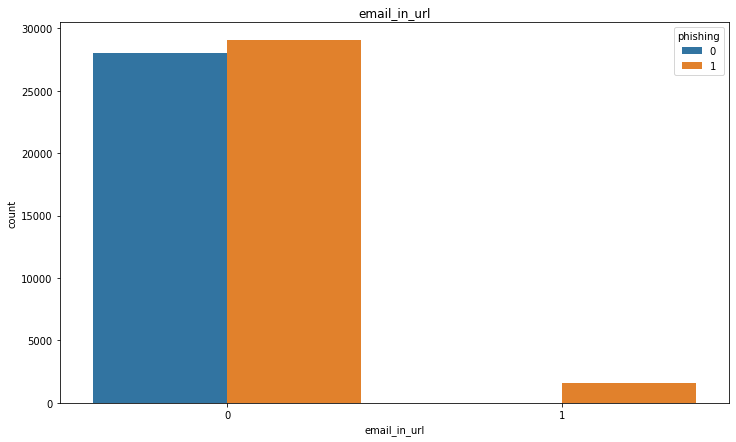

In [15]:
for feat in discrete_based:
    plt.subplots(figsize = (12,7))
    sns.countplot(x=feat, data = df, hue="phishing")
    plt.title(feat)
    plt.show();

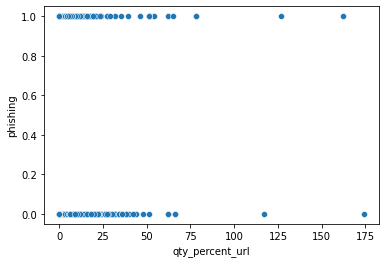

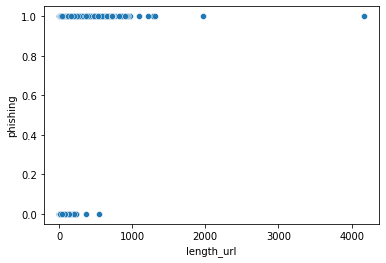

In [16]:
for feat in continous_based:
    sns.scatterplot(x=feat, y="phishing",data=df)
    plt.show()

<AxesSubplot:>

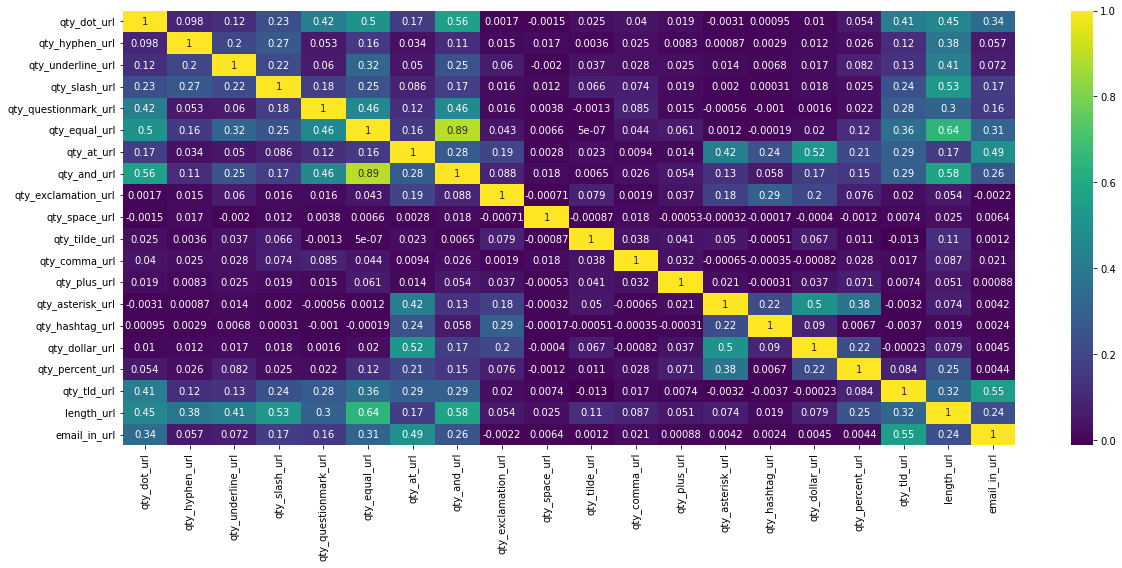

In [17]:
plt.subplots(figsize=(20,8))
sns.heatmap(df[based_url].corr(), annot=True,cmap="viridis")

#### Observation

1. By seeing the countplot of discrete features we can say that the majority of legitimate website is when the value is 0.
2. If the length of URL is high then it is also a sign of non legitimate website
2. qty_qual_url and qty_url these two features are also highly correlated. So, we'll remove one feature between them in feature engineering.


##### 2nd Group domain URL

In [18]:
domain_feat = [feat for feat in df.columns[19:40]]

In [19]:
df[domain_feat].head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0


In [20]:
discrete_feat = [feat for feat in domain_feat if df[feat].nunique()<35]
continous_feat = [feat for feat in domain_feat if feat not in discrete_feat]

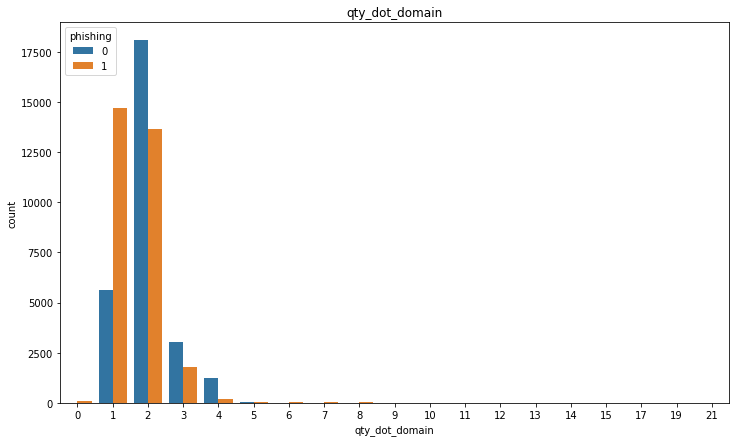

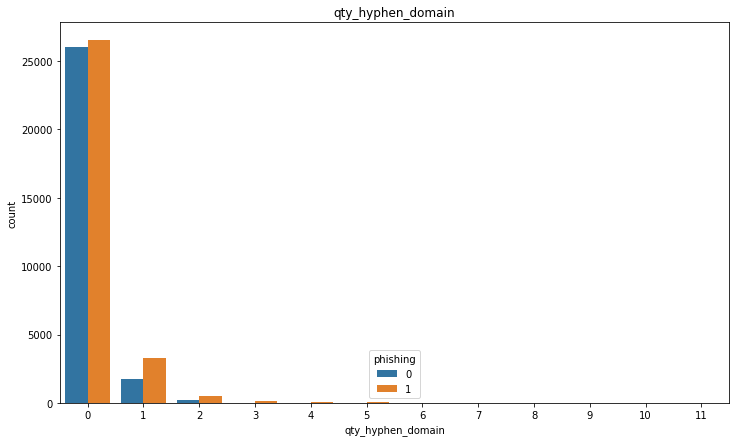

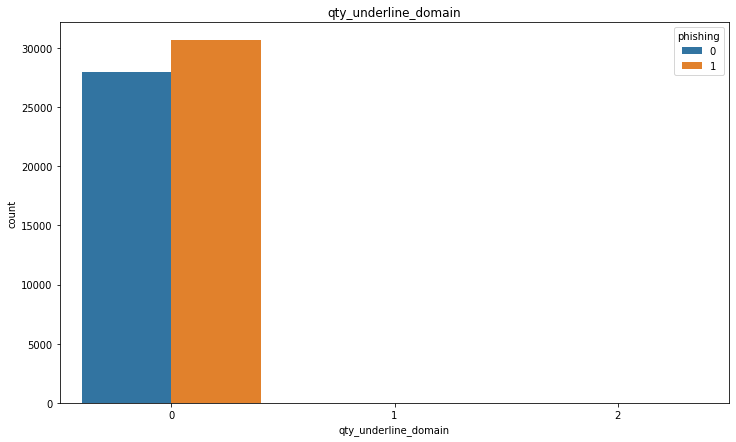

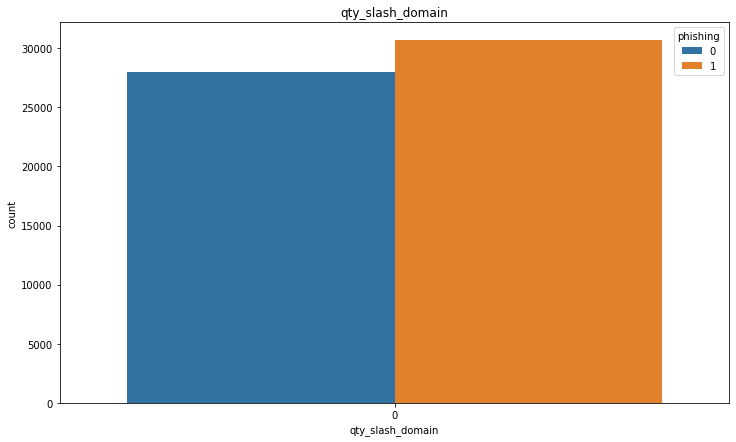

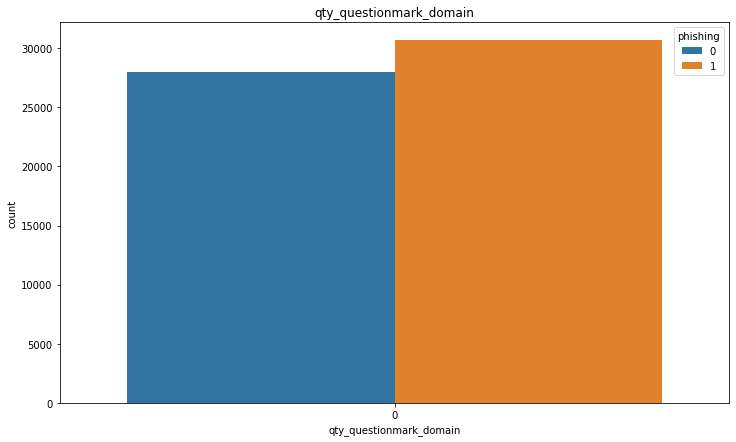

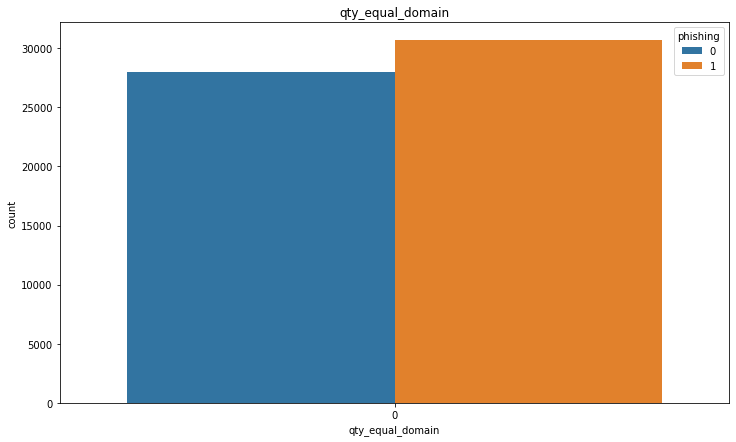

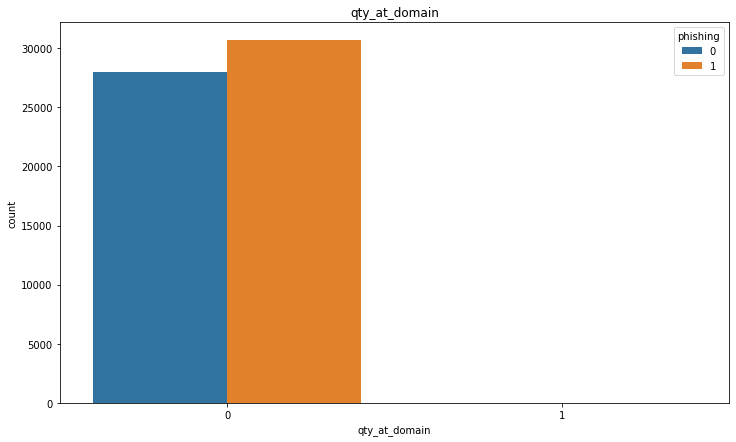

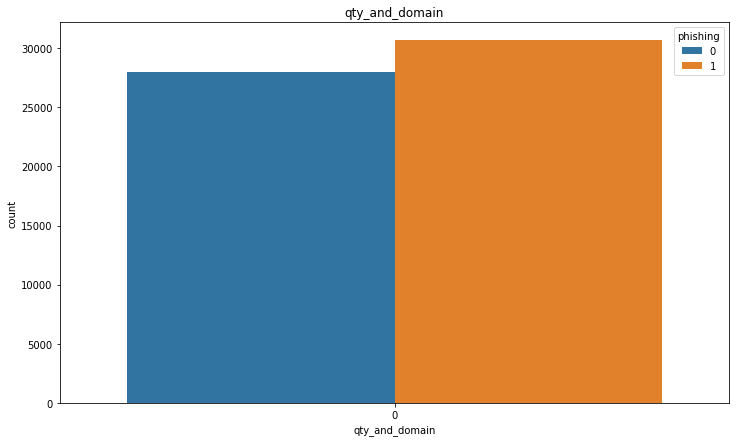

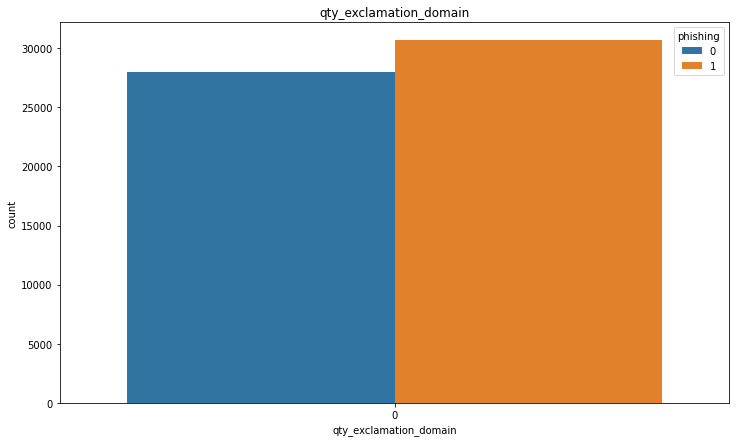

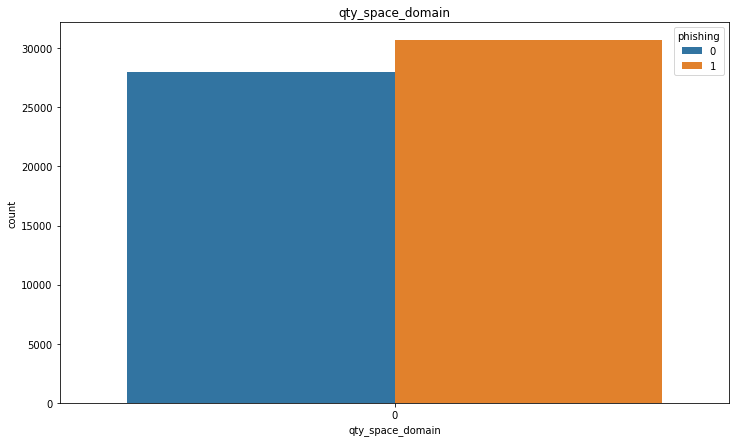

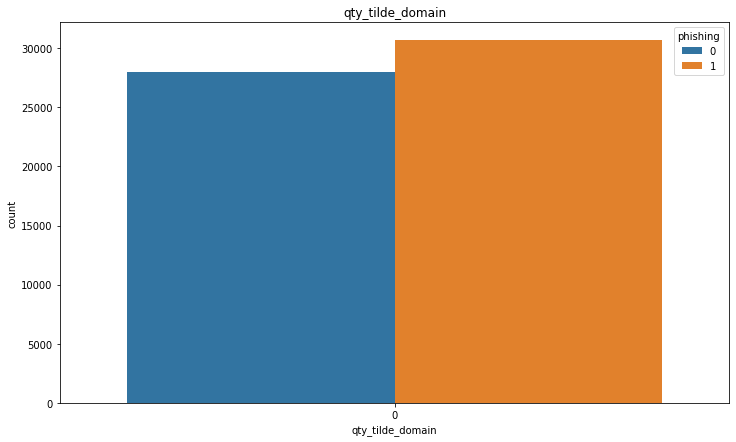

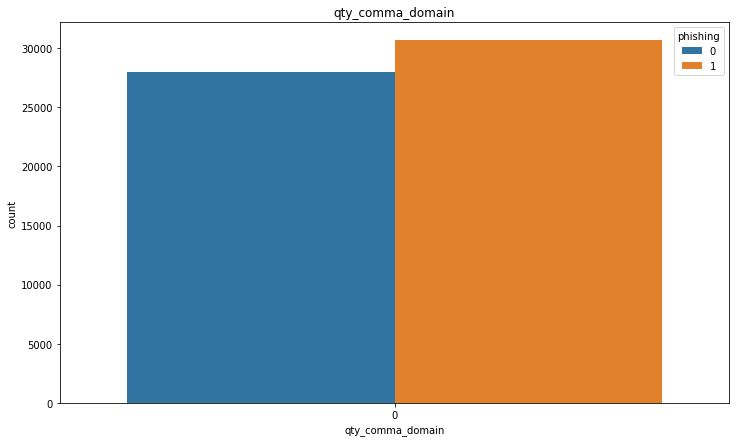

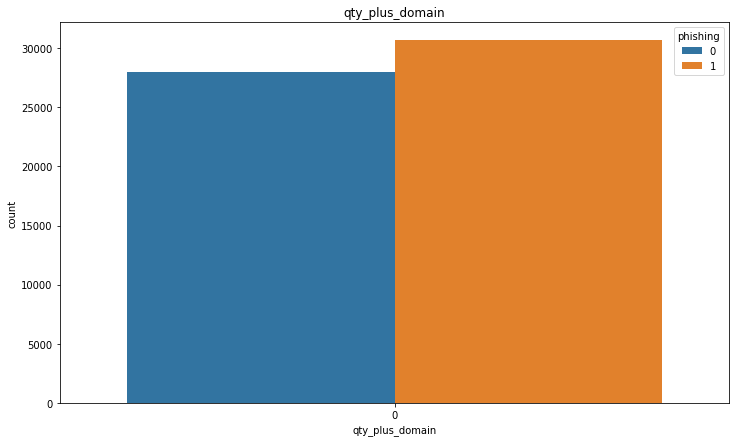

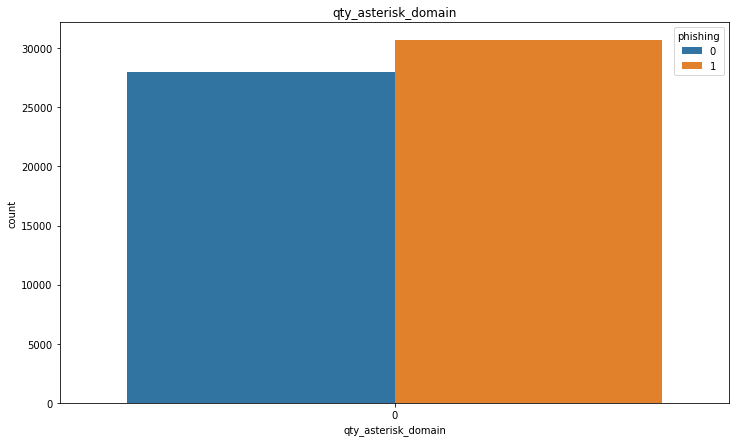

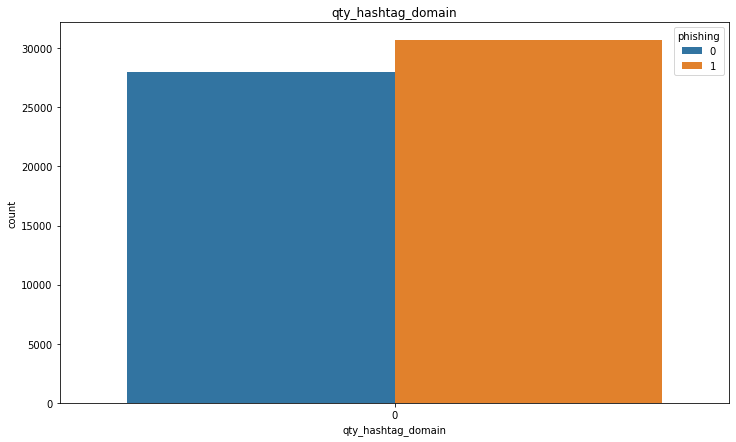

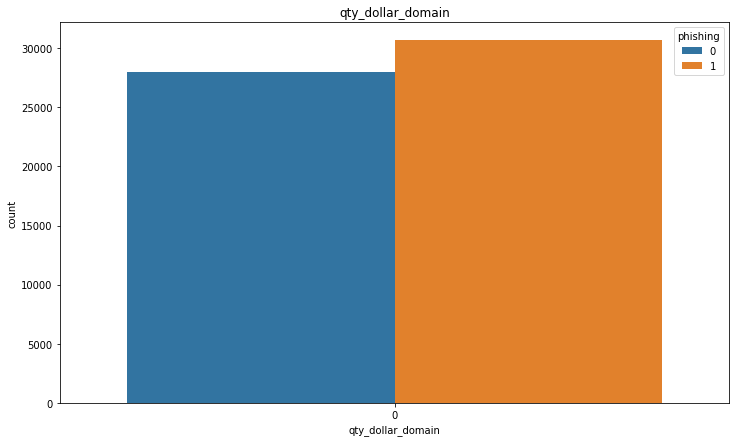

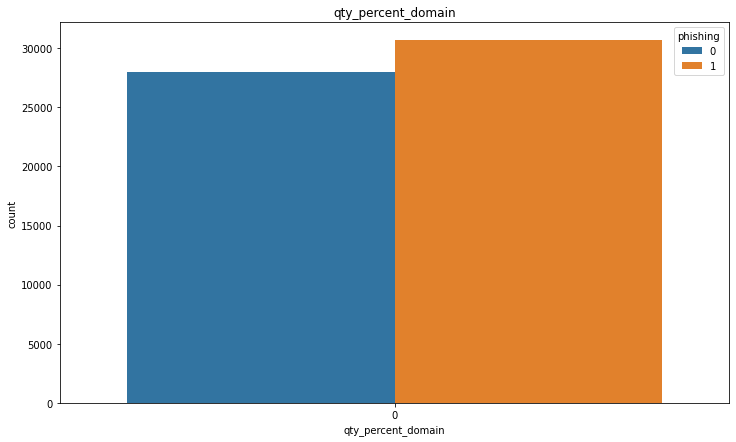

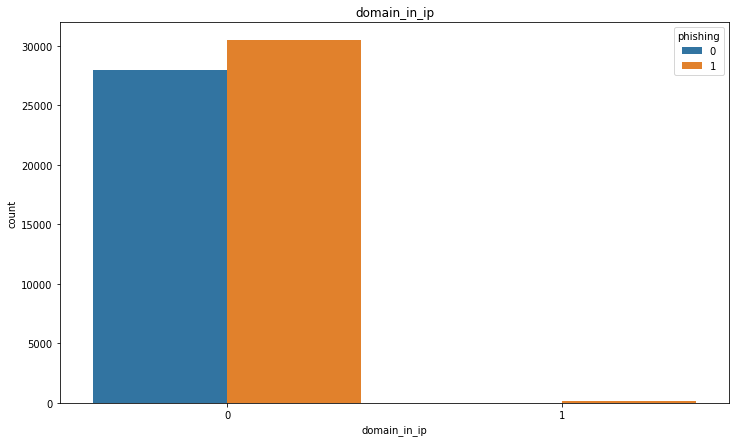

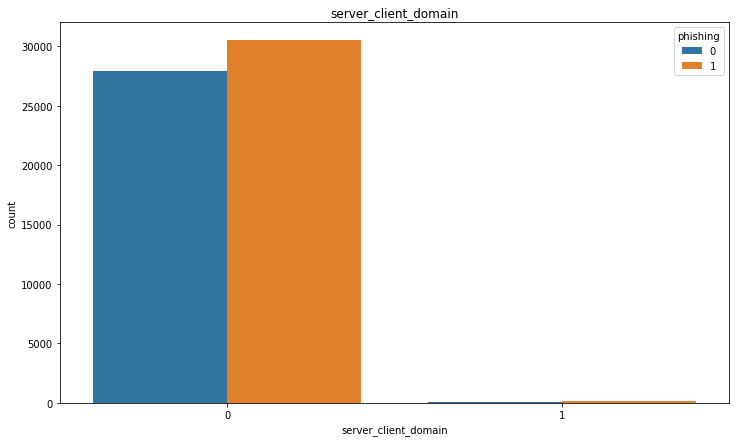

In [21]:
for feat in discrete_feat:
    plt.subplots(figsize=(12,7))
    sns.countplot(x=feat, data=df, hue="phishing")
    plt.title(feat)
    plt.show();

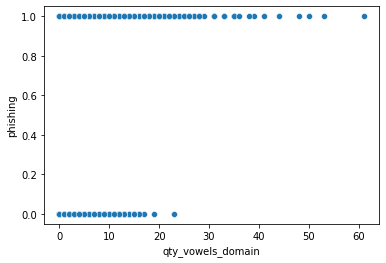

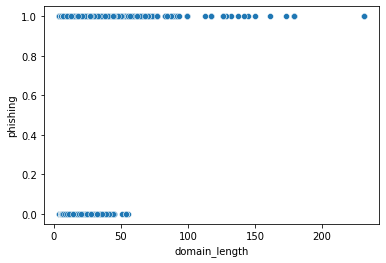

In [22]:
for feat in continous_feat:
    sns.scatterplot(x=feat,y="phishing", data=df)
    plt.show();

<AxesSubplot:>

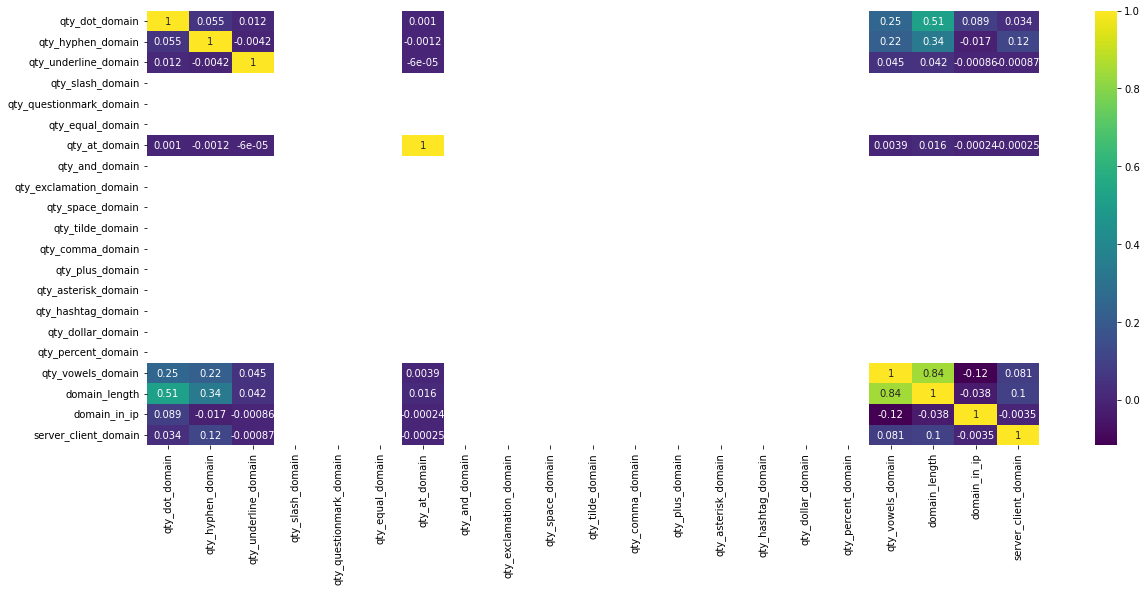

In [23]:
plt.subplots(figsize=(20,8))
sns.heatmap(df[domain_feat].corr(), annot=True,cmap="viridis")

#### Observation

1. There are lots of features in domain group which have only one value which is zero. So, we have to drop those values because it is not giving any information and it is also not important.
2. By seeing scatterplot we can say that if the domain length is high we can say that the site is not legitimate.
3. There is also two features which is heighly correlated to each others.

##### 3rd Group URL directory

In [24]:
directory_feat = [feat for feat in df.columns[41:58]]

In [25]:
df[directory_feat].head()

,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13
4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27


In [26]:
discrete_feat = [feat for feat in directory_feat if df[feat].nunique()<35]
continous_feat = [feat for feat in directory_feat if feat not in discrete_feat]

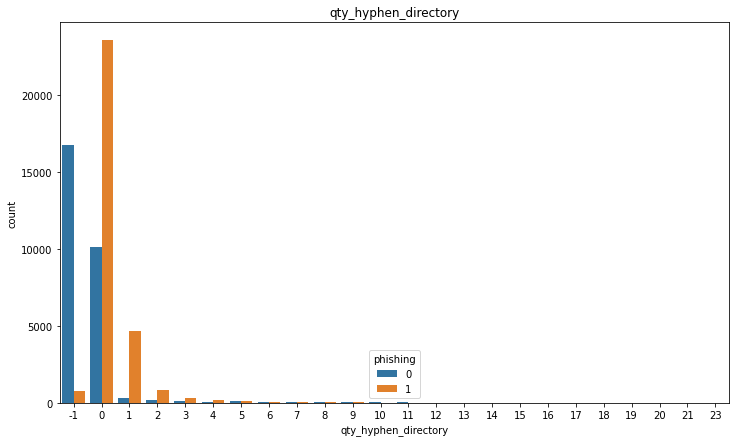

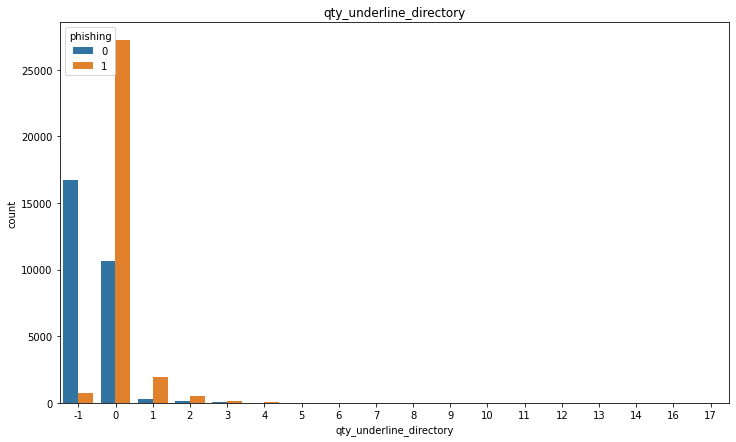

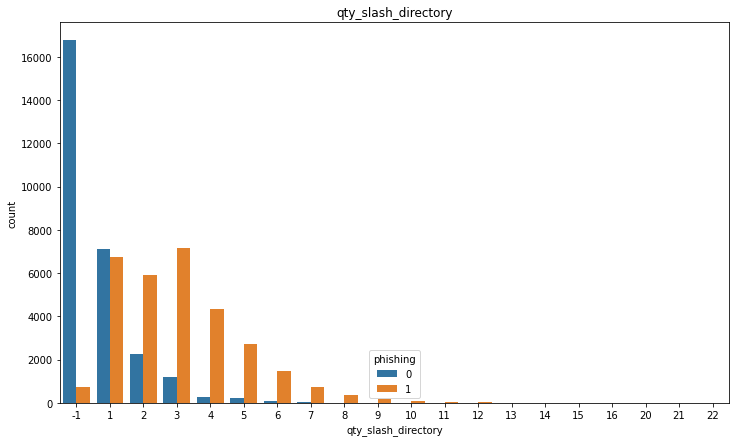

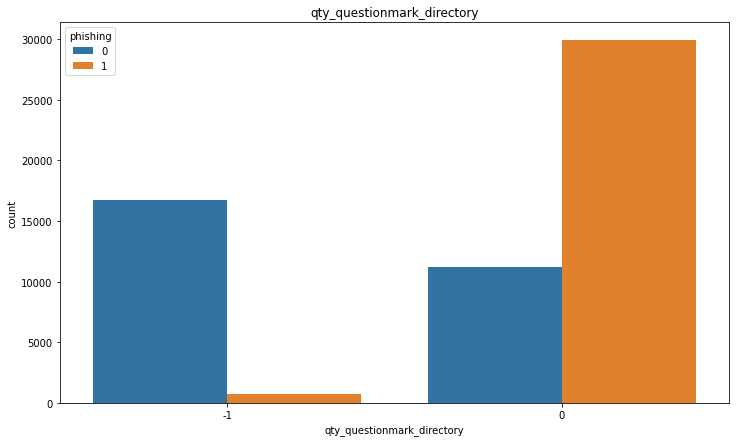

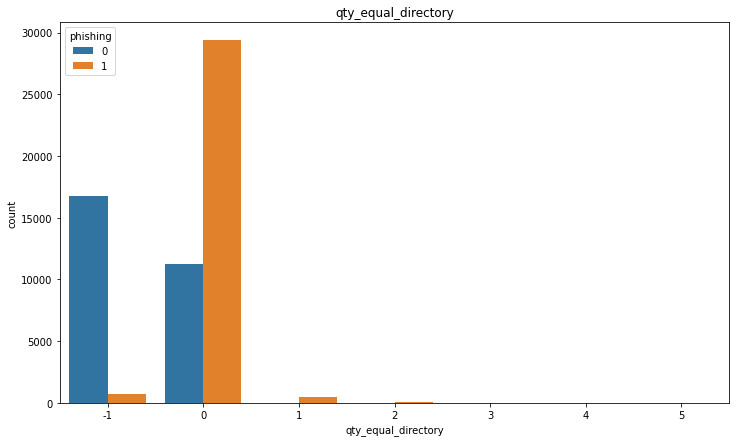

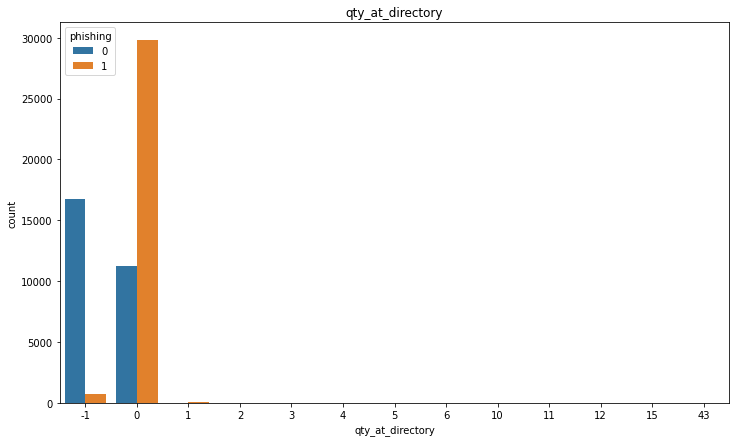

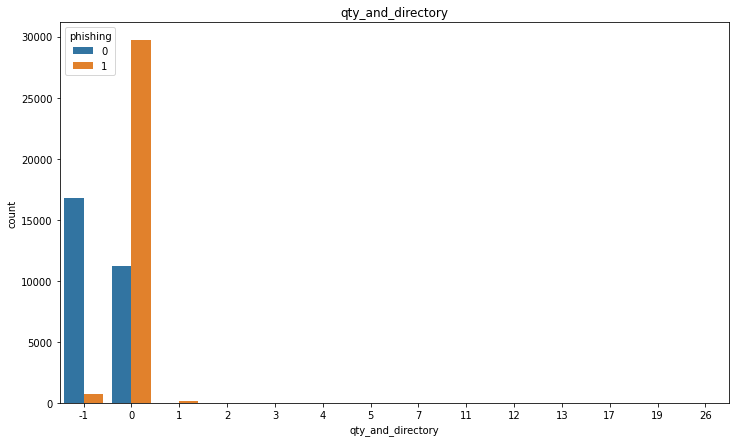

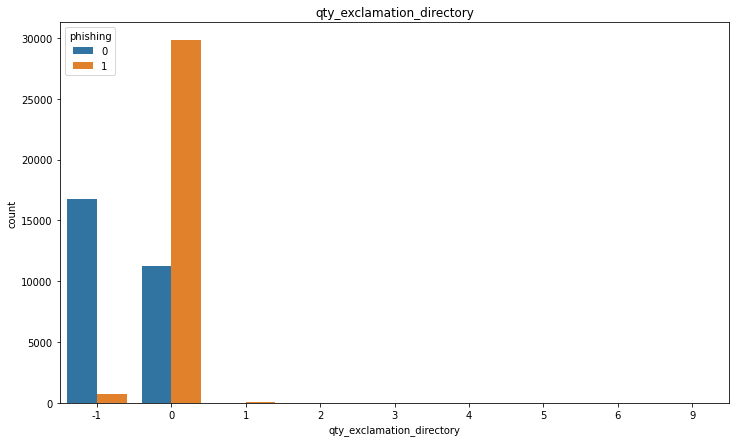

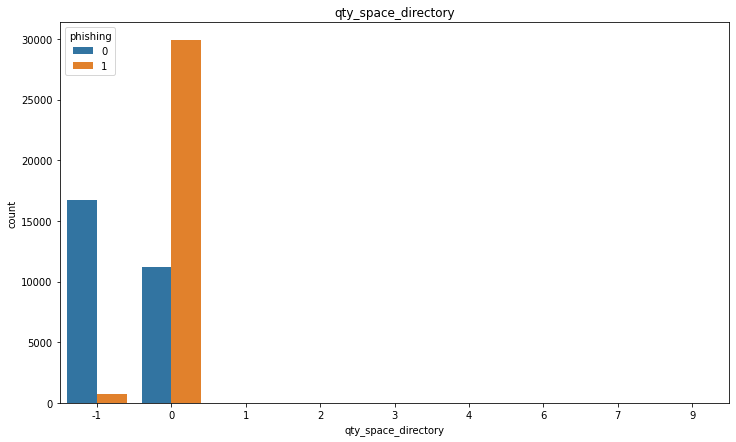

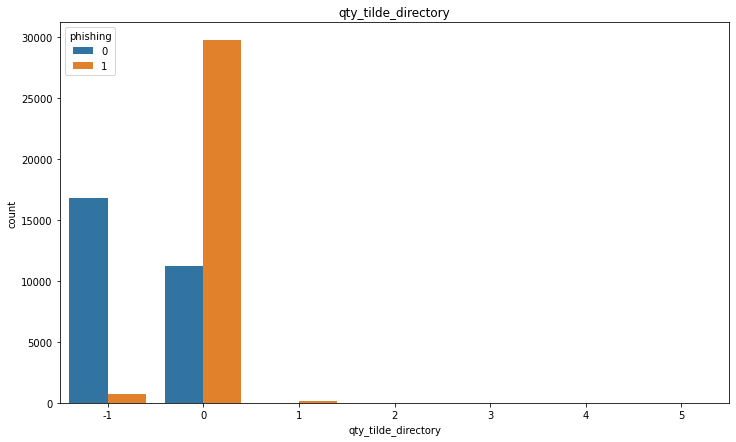

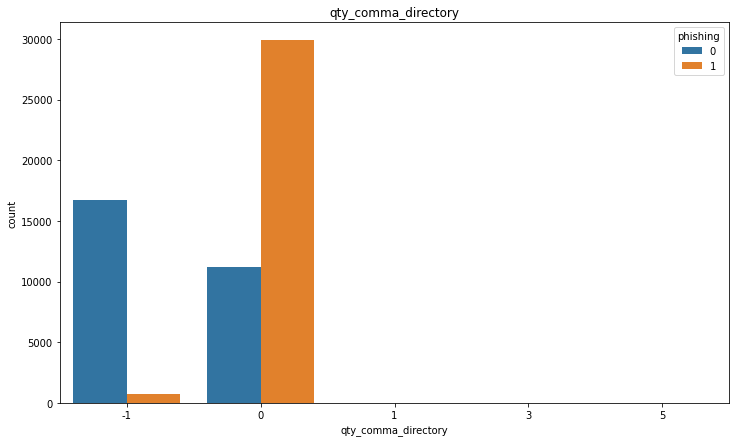

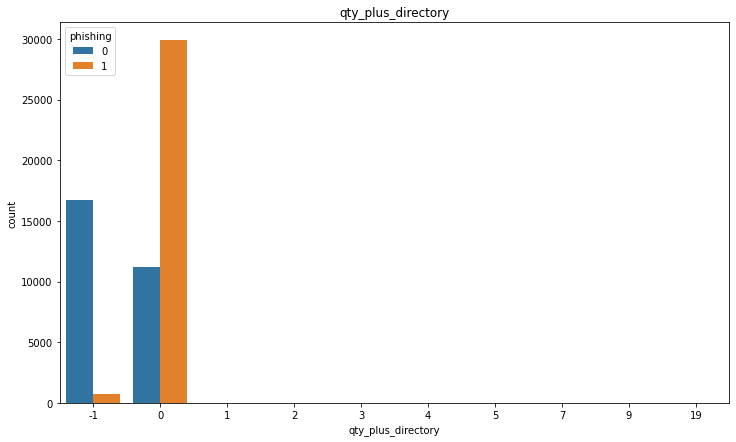

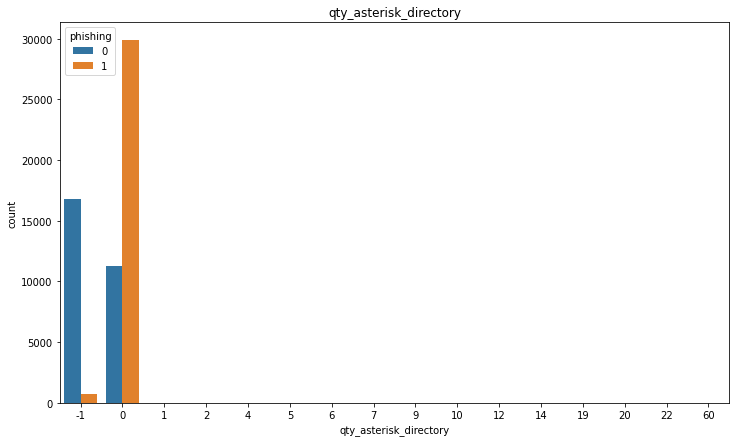

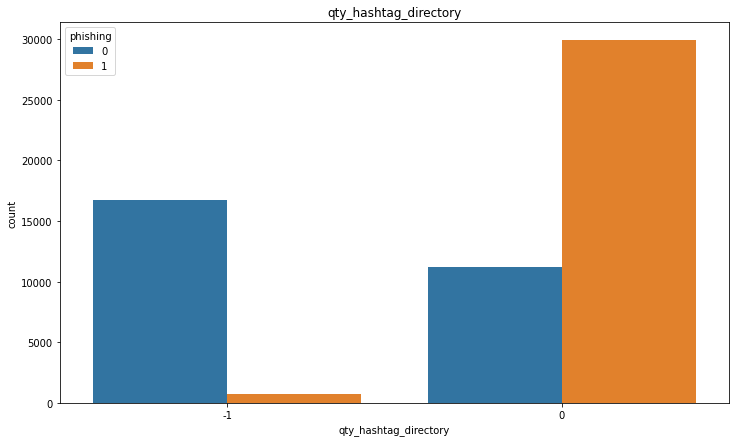

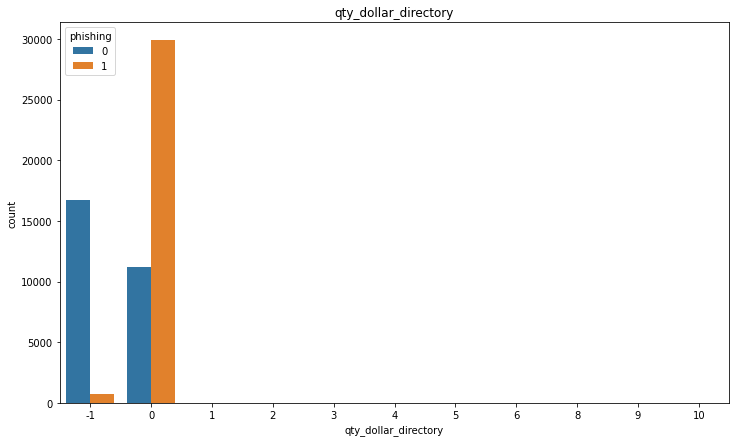

In [27]:
for feat in discrete_feat:
    plt.subplots(figsize=(12,7))
    sns.countplot(x=feat, data=df, hue="phishing")
    plt.title(feat)
    plt.show();

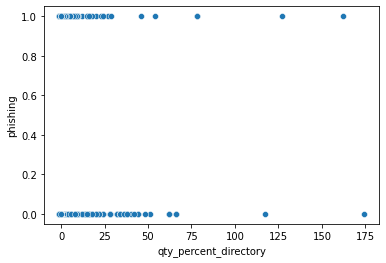

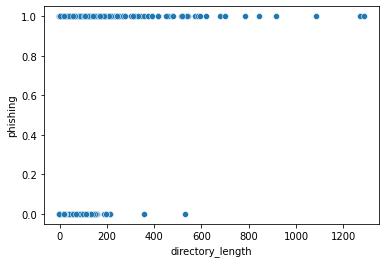

In [28]:
for feat in continous_feat:
    sns.scatterplot(x=feat,y="phishing", data=df)
    plt.show()

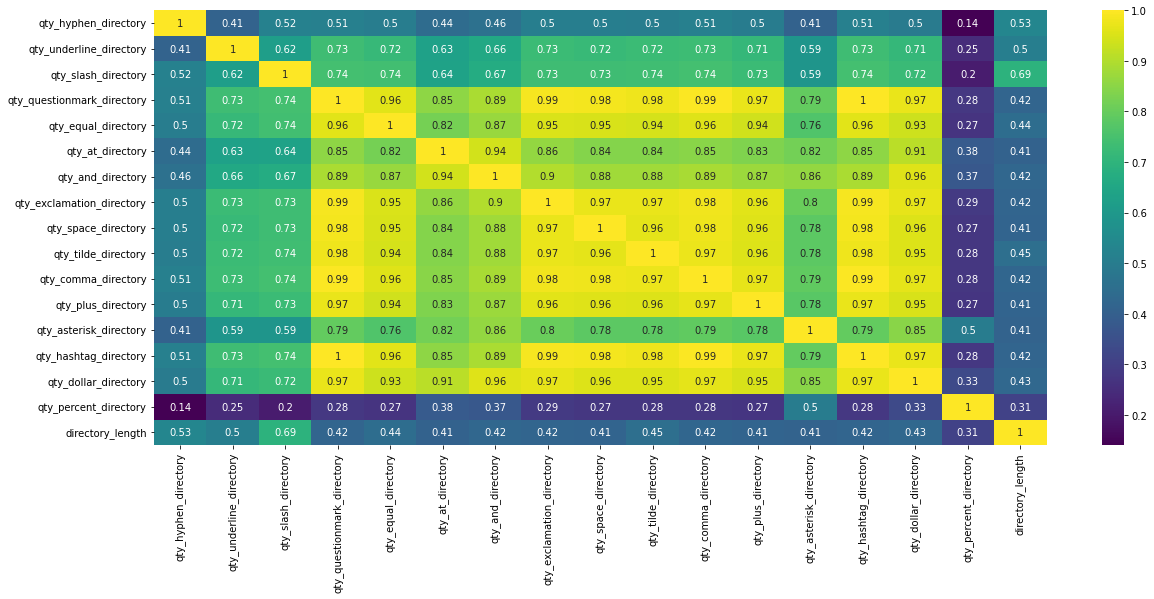

In [29]:
plt.subplots(figsize=(20,8))
sns.heatmap(df[directory_feat].corr(), annot=True,cmap="viridis");

#### Observation

1. By seeing countplot we understand that where ever the value is -1 it says that the site is legitimate.
2. here, as well it shows that the length or directory if more the site is not legitimate.
3. There are lots of features which are highly correlated to each other.

##### 4th group URL filename

In [30]:
filename_feat = [feat for feat in df.columns[58:76]]

In [31]:
discrete_feat = [feat for feat in filename_feat if df[feat].nunique()<35]
continous_feat = [feat for feat in filename_feat if feat not in discrete_feat]

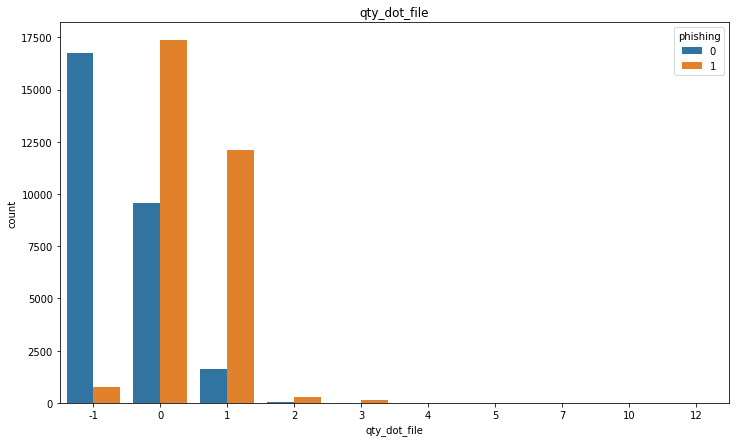

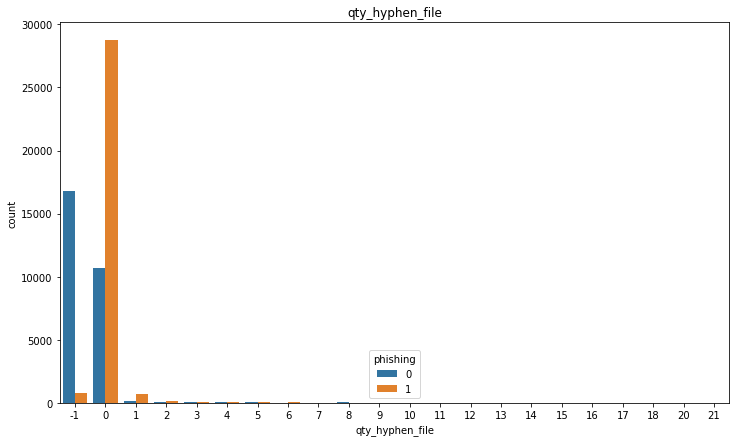

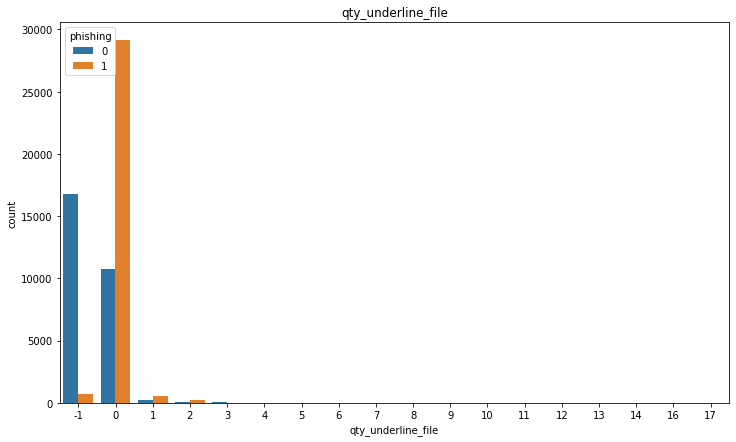

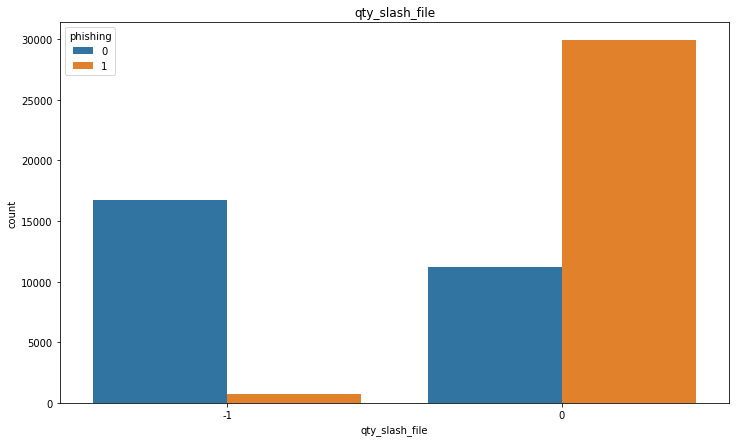

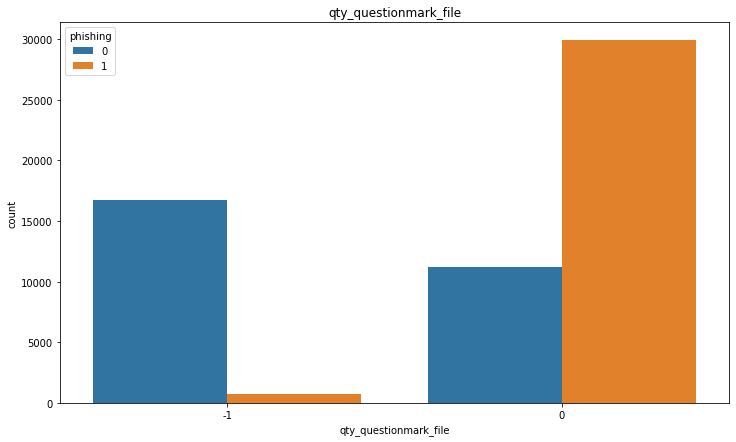

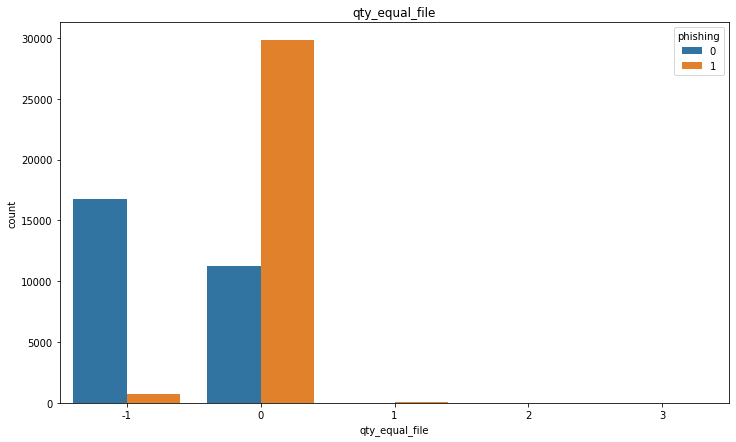

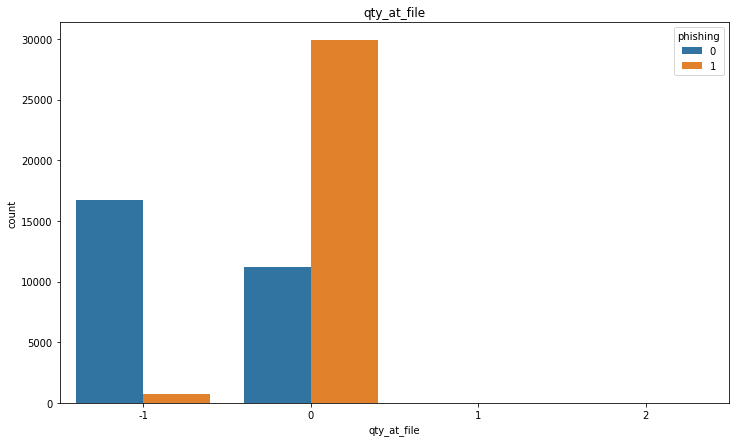

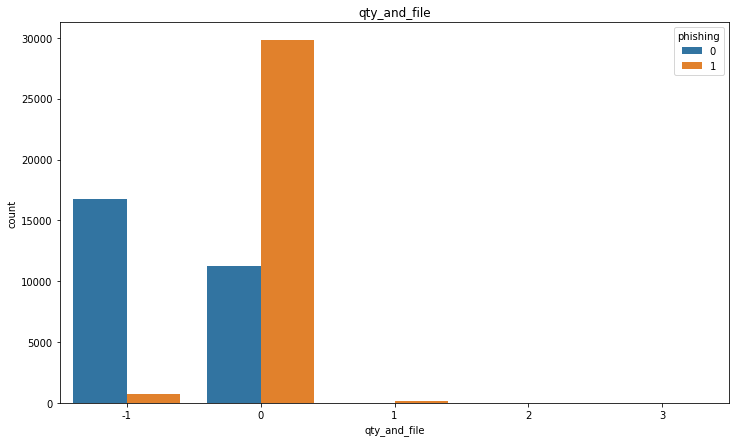

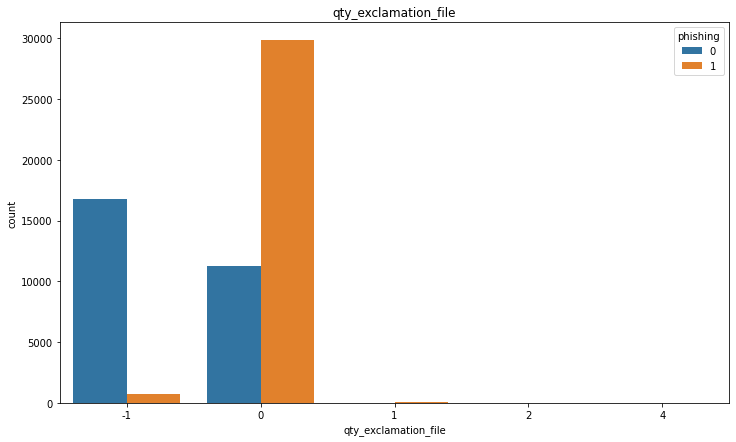

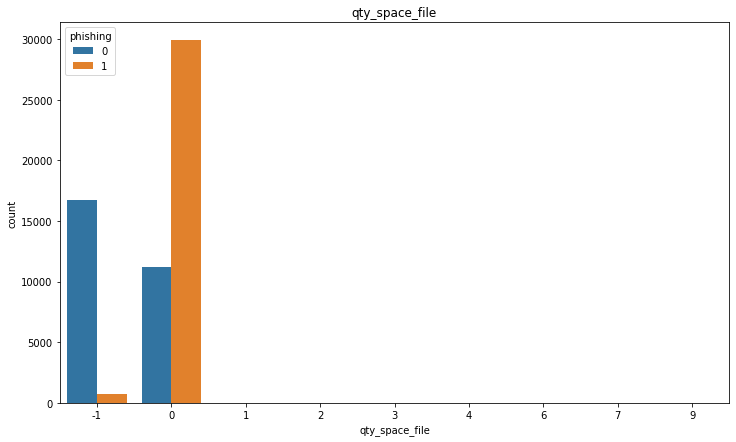

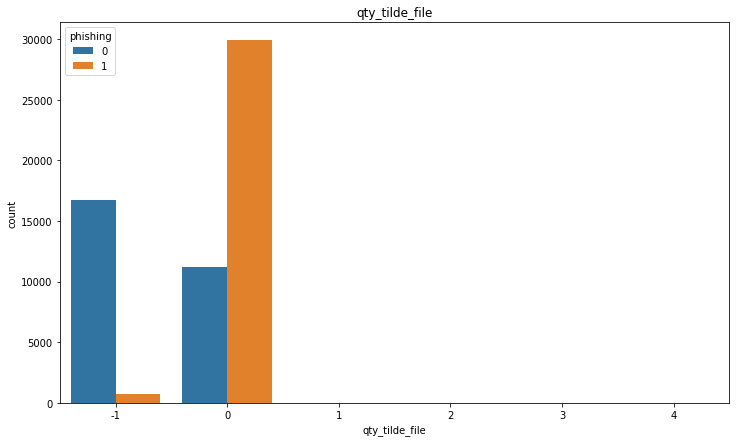

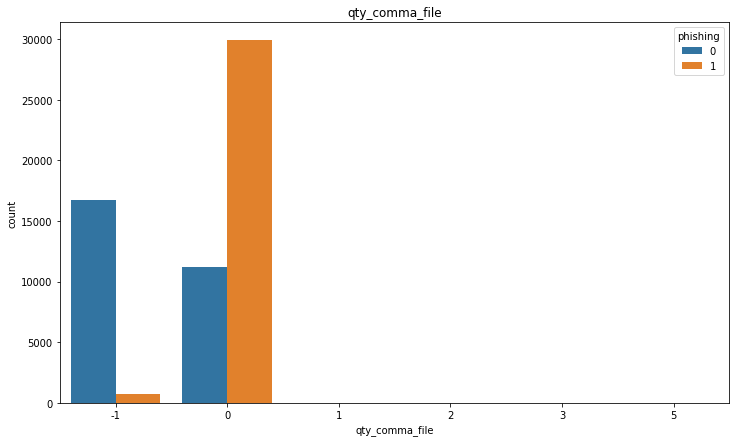

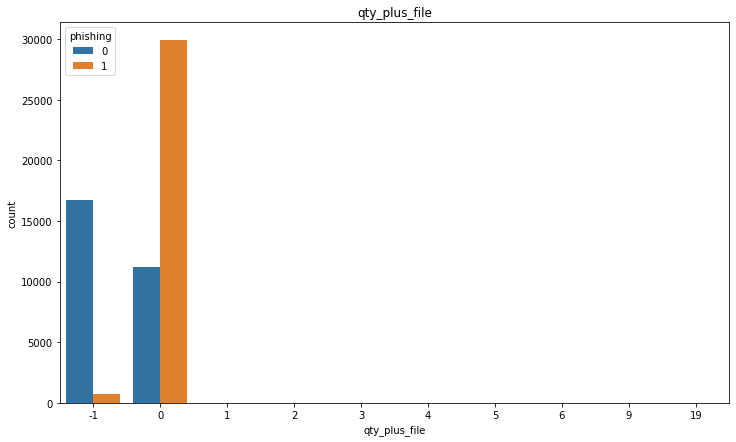

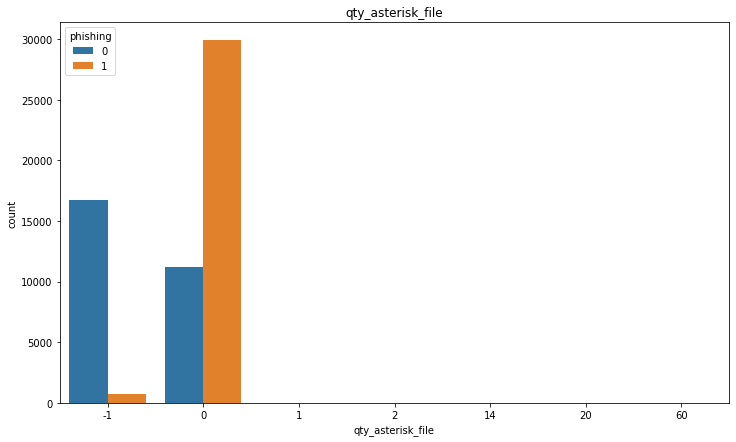

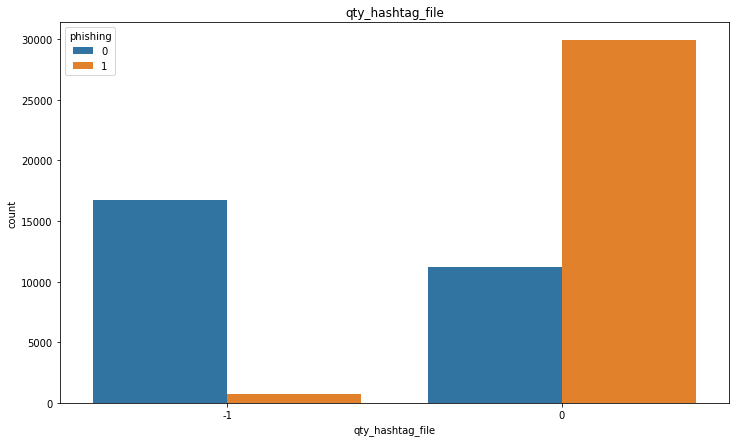

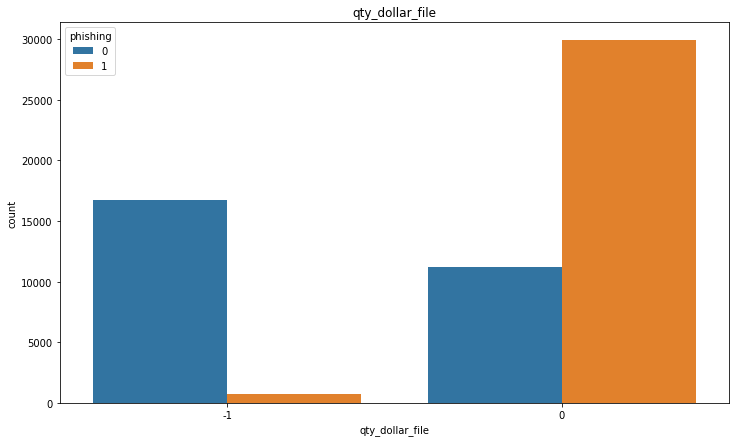

In [32]:
for feat in discrete_feat:
    plt.subplots(figsize=(12,7))
    sns.countplot(x=feat, data=df, hue="phishing")
    plt.title(feat)
    plt.show();

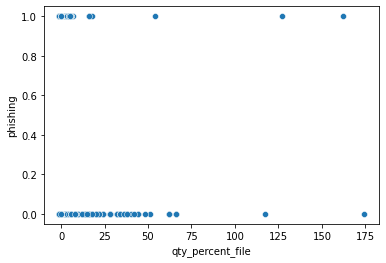

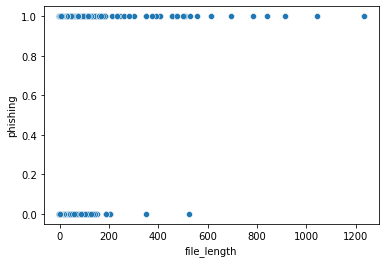

In [33]:
for feat in continous_feat:
    sns.scatterplot(x=feat,y="phishing", data=df)
    plt.show()

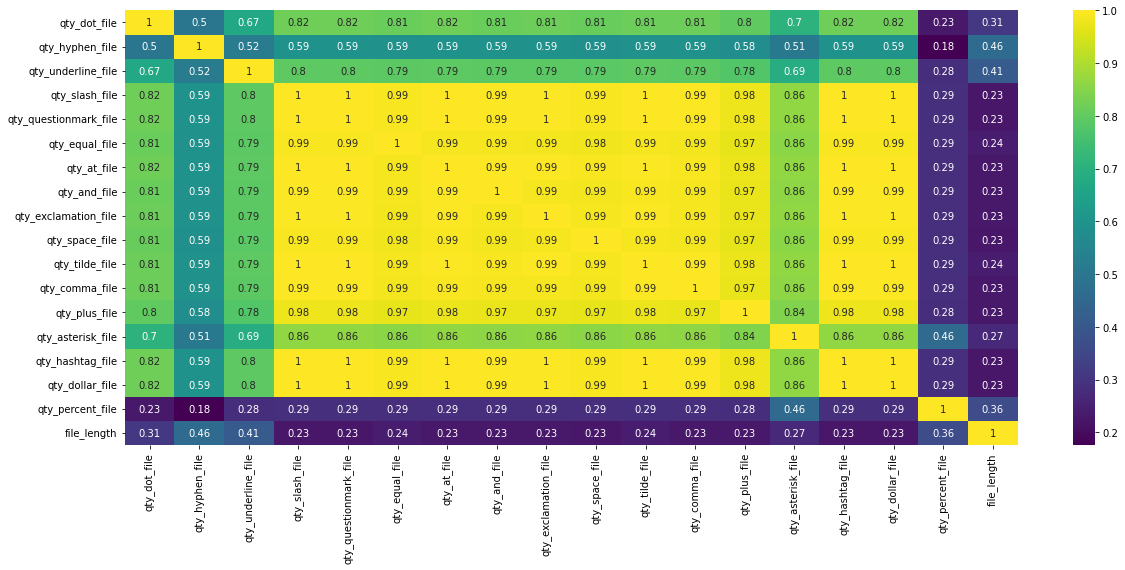

In [34]:
plt.subplots(figsize=(20,8))
sns.heatmap(df[filename_feat].corr(), annot=True,cmap="viridis");

#### Observation

1. By seeing countplot we understand that where ever the value is -1 it says that the site is legitimate.
2. here, as well it shows that the length or file if more the site is not legitimate.
3. There are lots of features which are highly correlated to each other.

##### 5th group URL parameters

In [35]:
params_feat = [feat for feat in df.columns[76:96]]

In [36]:
discrete_feat = [feat for feat in params_feat if df[feat].nunique()<35]
continous_feat = [feat for feat in params_feat if feat not in discrete_feat]

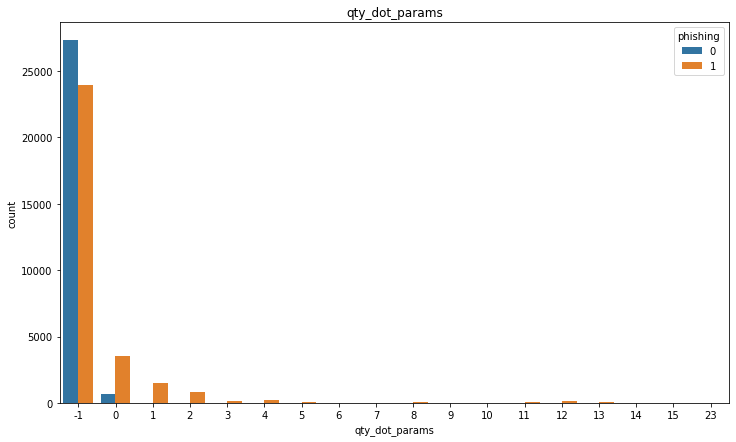

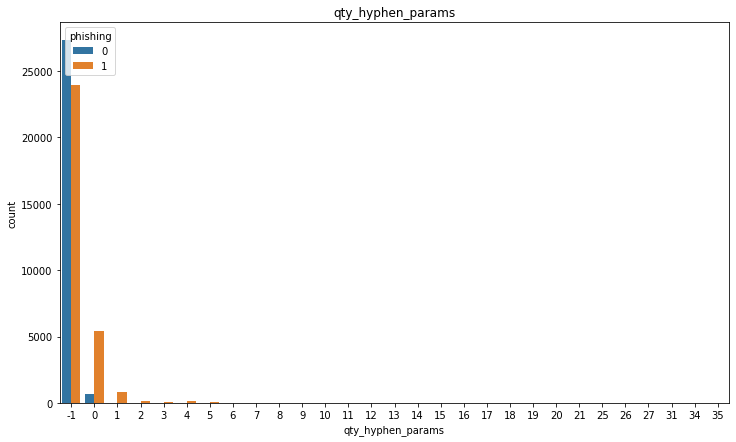

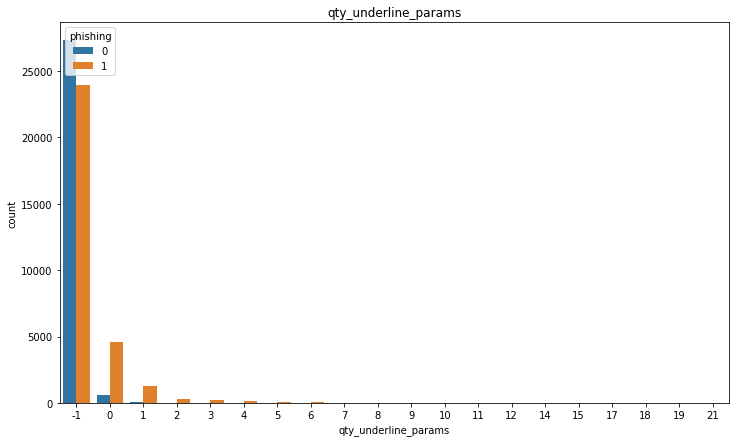

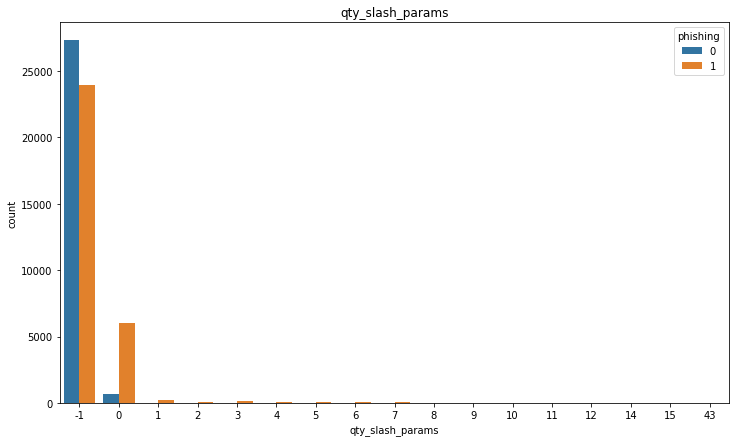

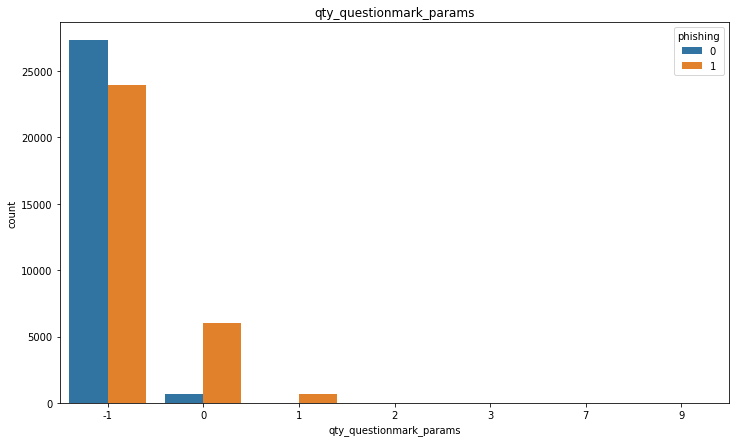

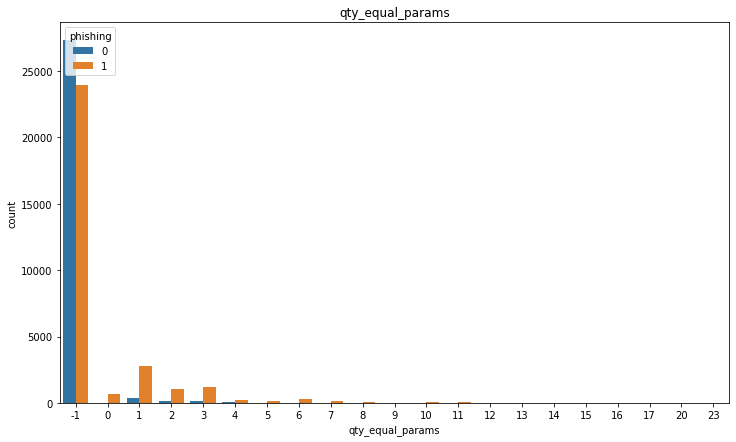

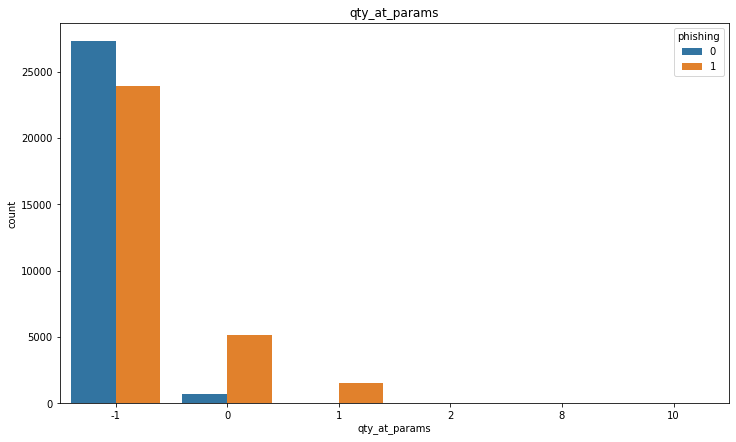

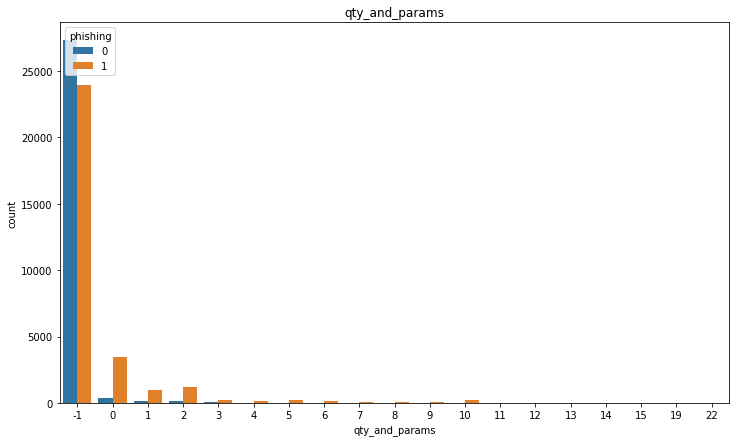

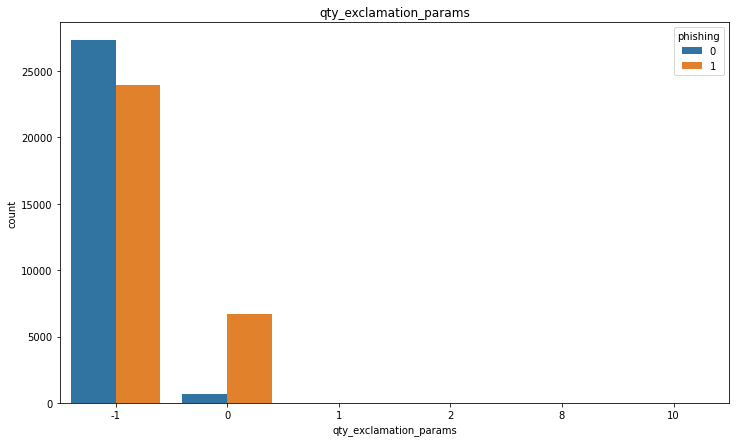

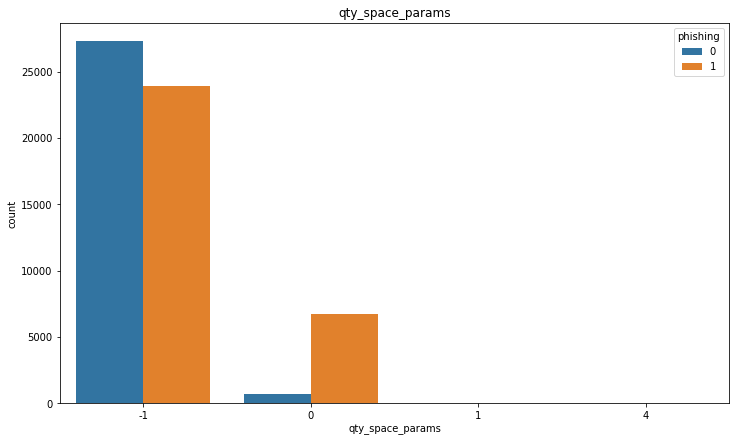

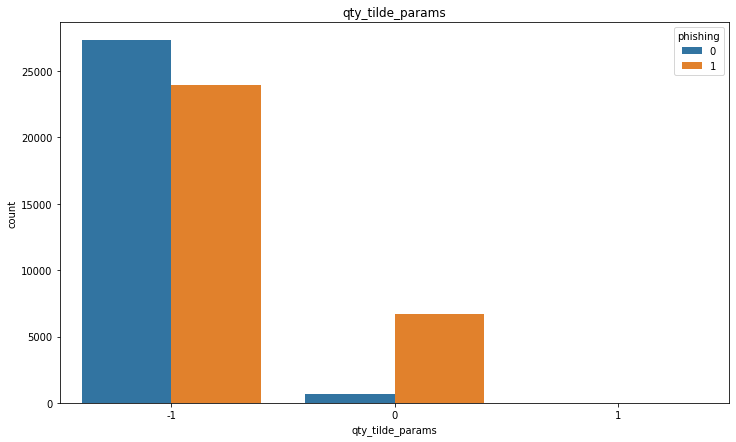

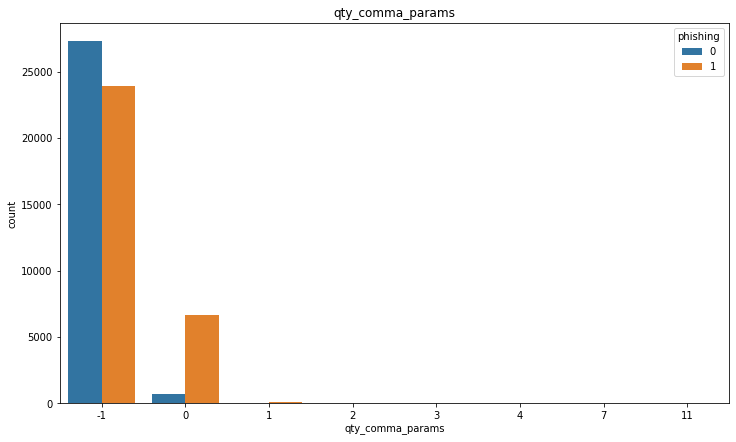

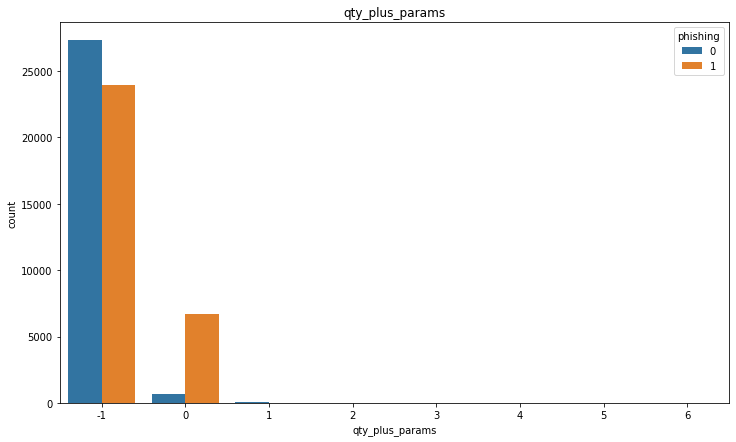

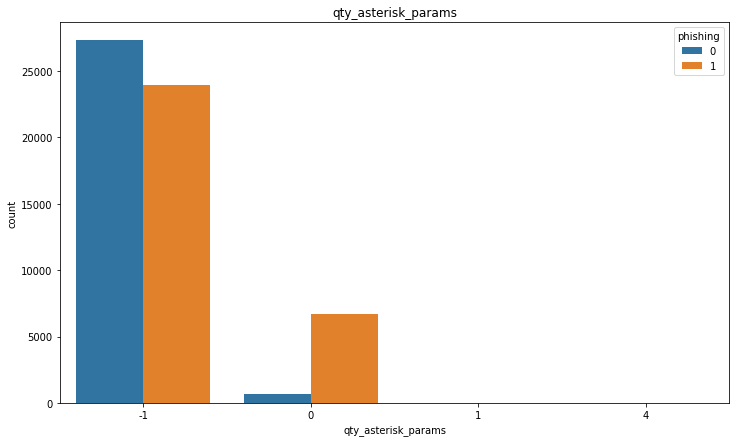

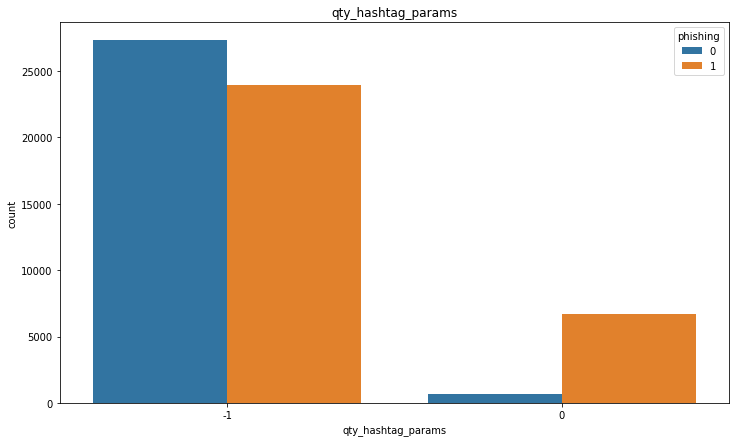

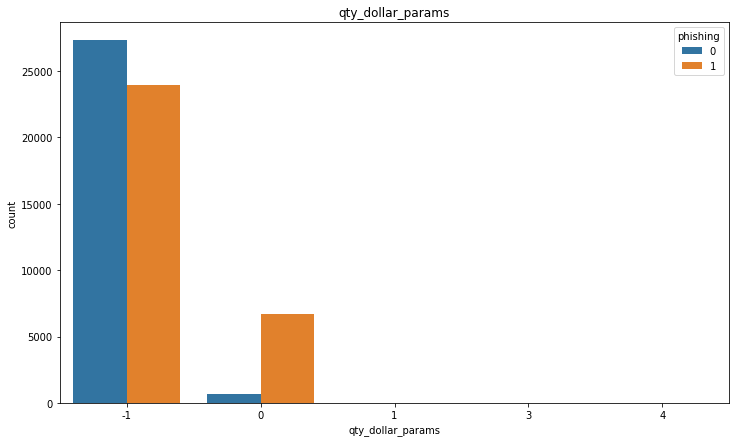

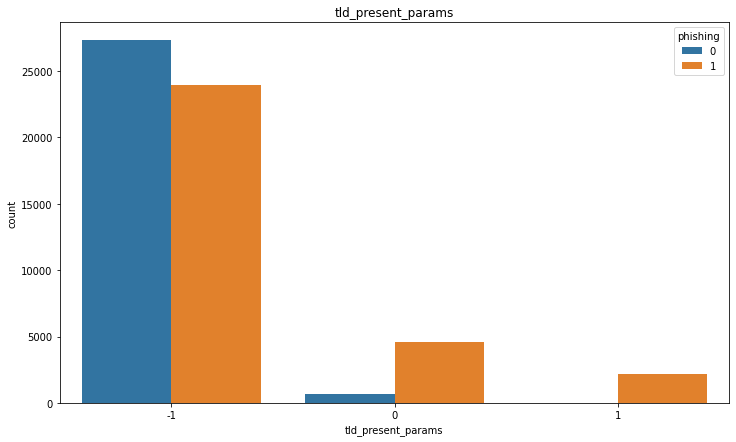

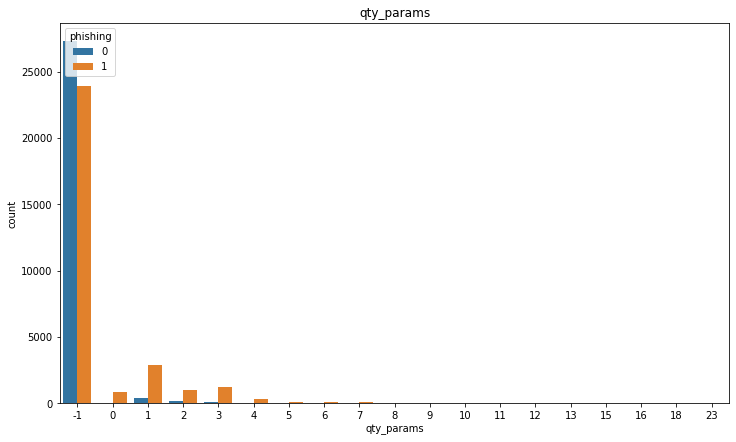

In [37]:
for feat in discrete_feat:
    plt.subplots(figsize=(12,7))
    sns.countplot(x=feat, data=df, hue="phishing")
    plt.title(feat)
    plt.show();

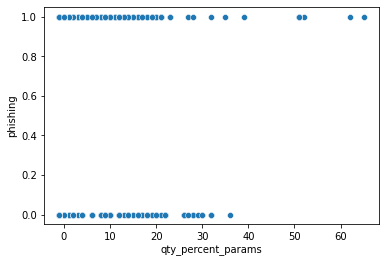

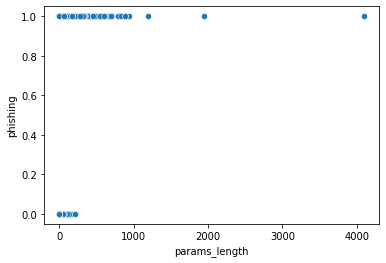

In [38]:
for feat in continous_feat:
    sns.scatterplot(x=feat,y="phishing", data=df)
    plt.show()

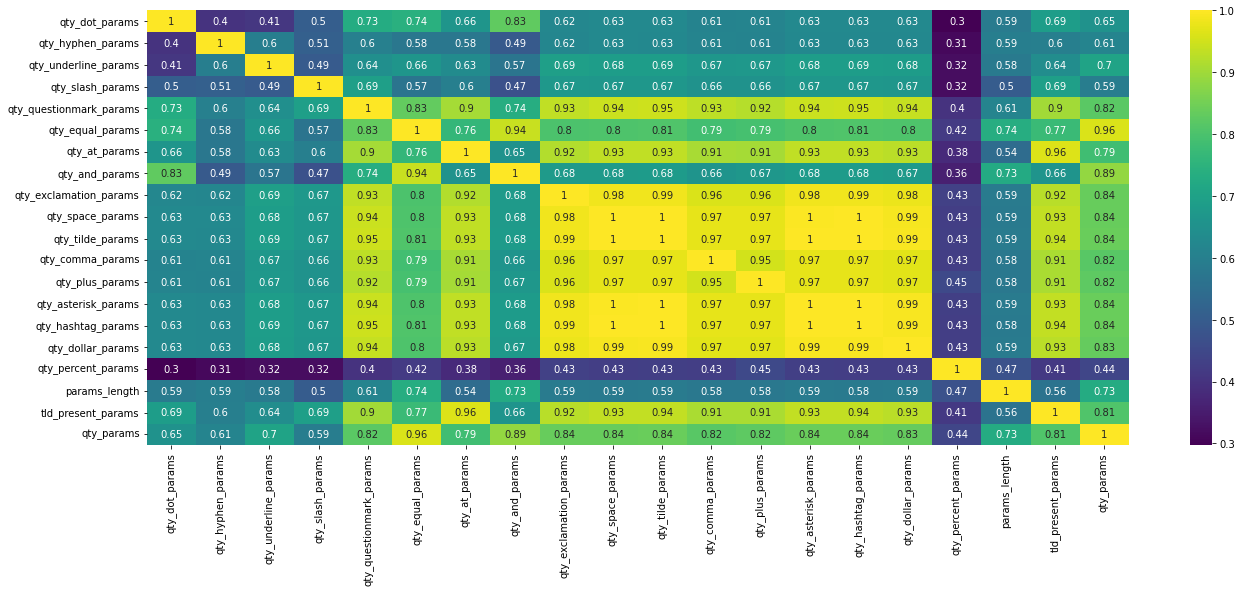

In [39]:
plt.subplots(figsize=(22,8))
sns.heatmap(df[params_feat].corr(), annot=True,cmap="viridis");

#### Observation

1. By seeing countplot we understand that where ever the value is -1 it says that the site is legitimate.
2. here, as well it shows that the length or params if more the site is not legitimate.
3. There are lots of features which are highly correlated to each other.

##### 6th Group  resolve URL

In [40]:
resolve_feat = [feat for feat in df.columns[96:-1]]

In [41]:
discrete_feat = [feat for feat in resolve_feat if df[feat].nunique()<35]
continous_feat = [feat for feat in resolve_feat if feat not in discrete_feat]

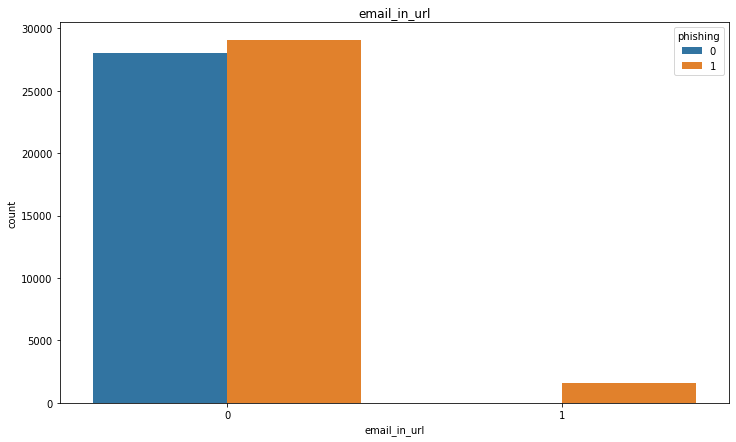

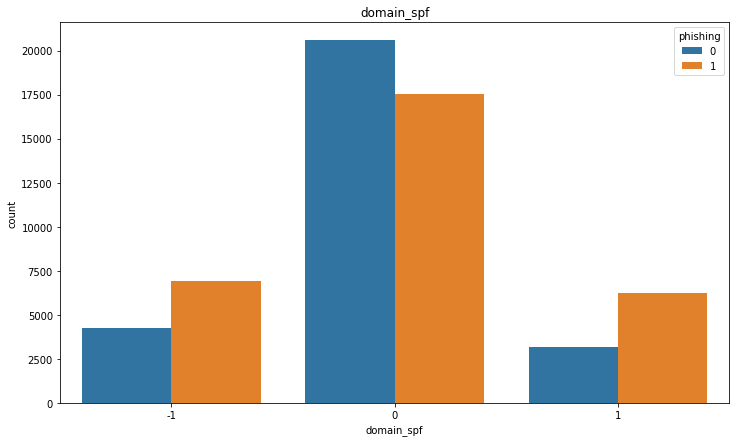

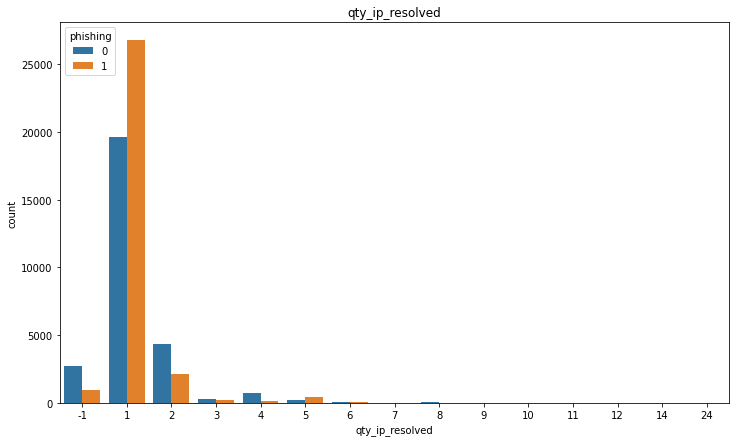

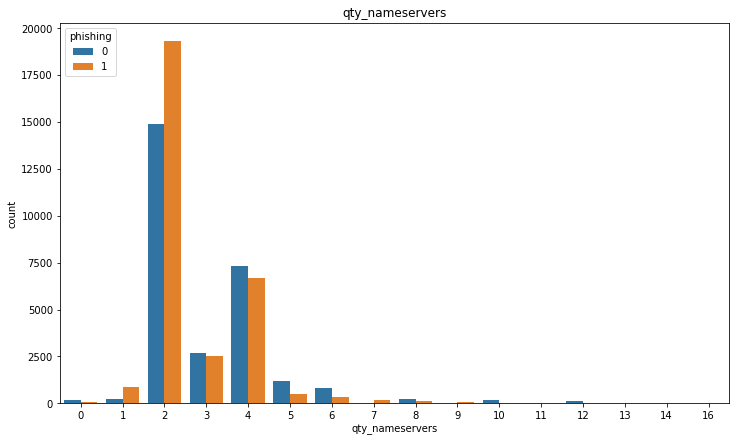

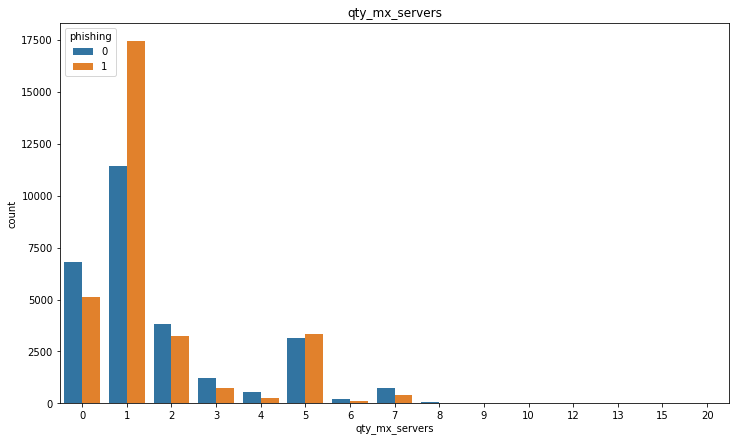

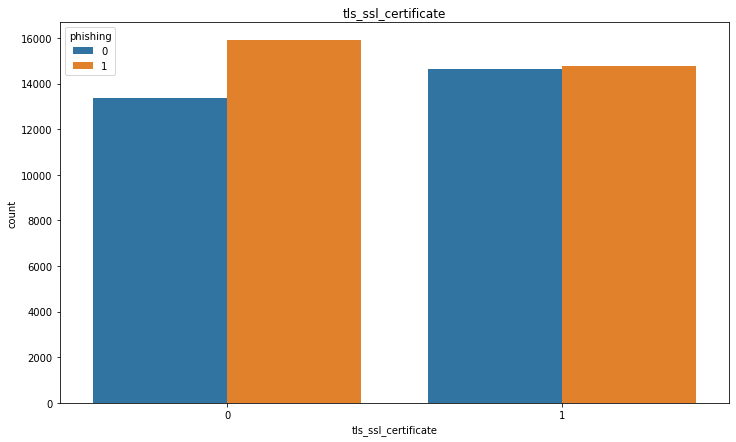

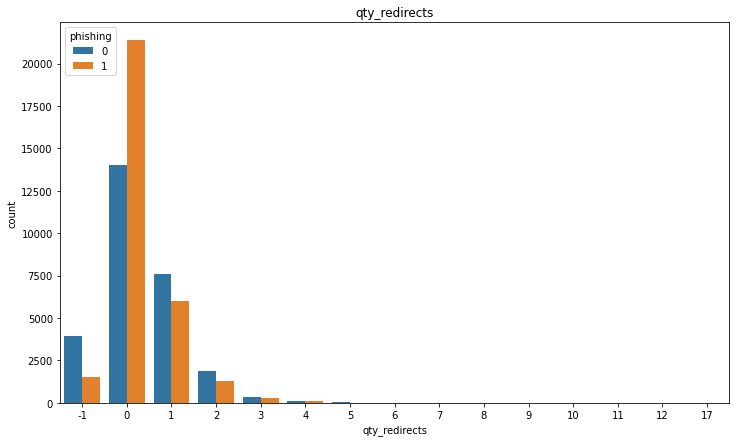

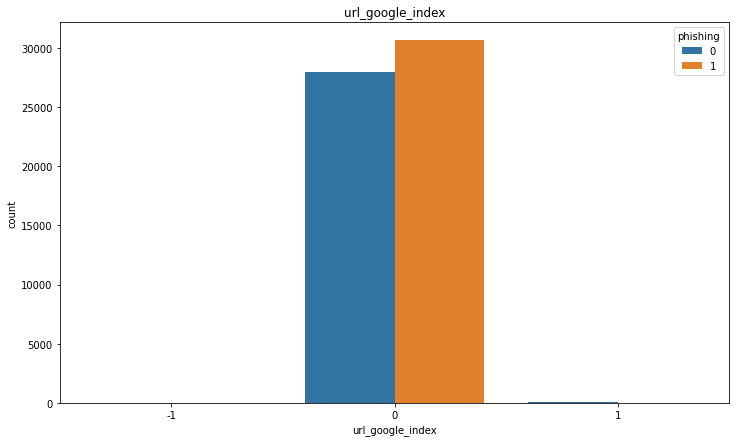

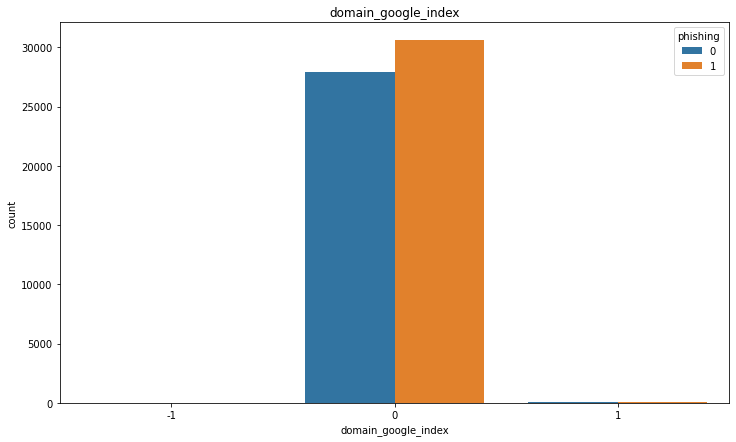

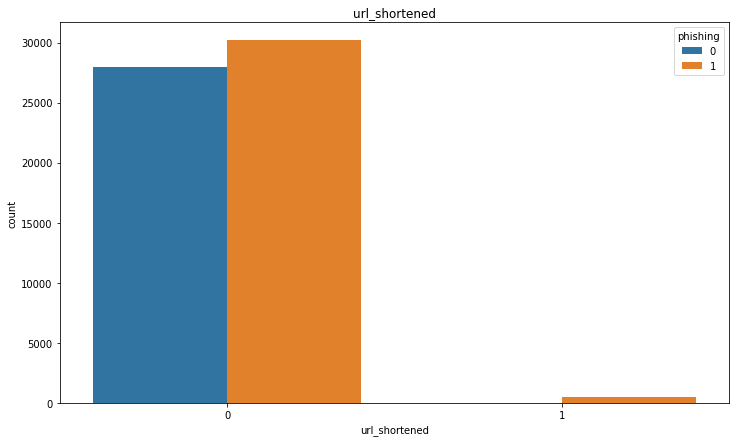

In [42]:
for feat in discrete_feat:
    plt.subplots(figsize=(12,7))
    sns.countplot(x=feat, data=df, hue="phishing")
    plt.title(feat)
    plt.show();

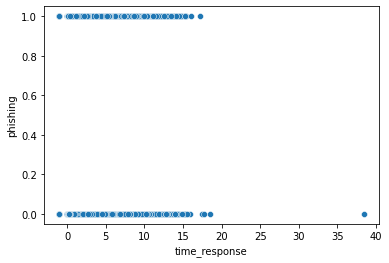

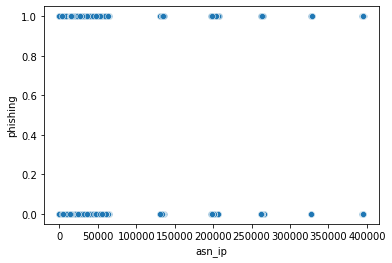

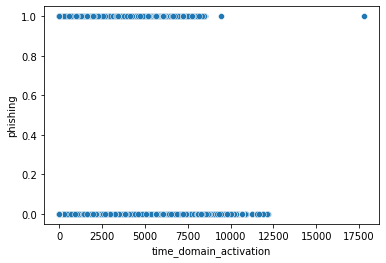

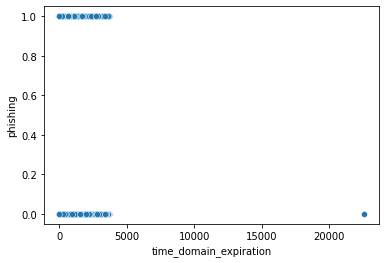

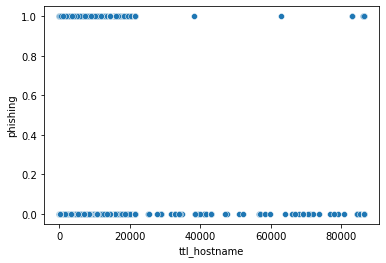

In [43]:
for feat in continous_feat:
    sns.scatterplot(x=feat,y="phishing", data=df)
    plt.show()

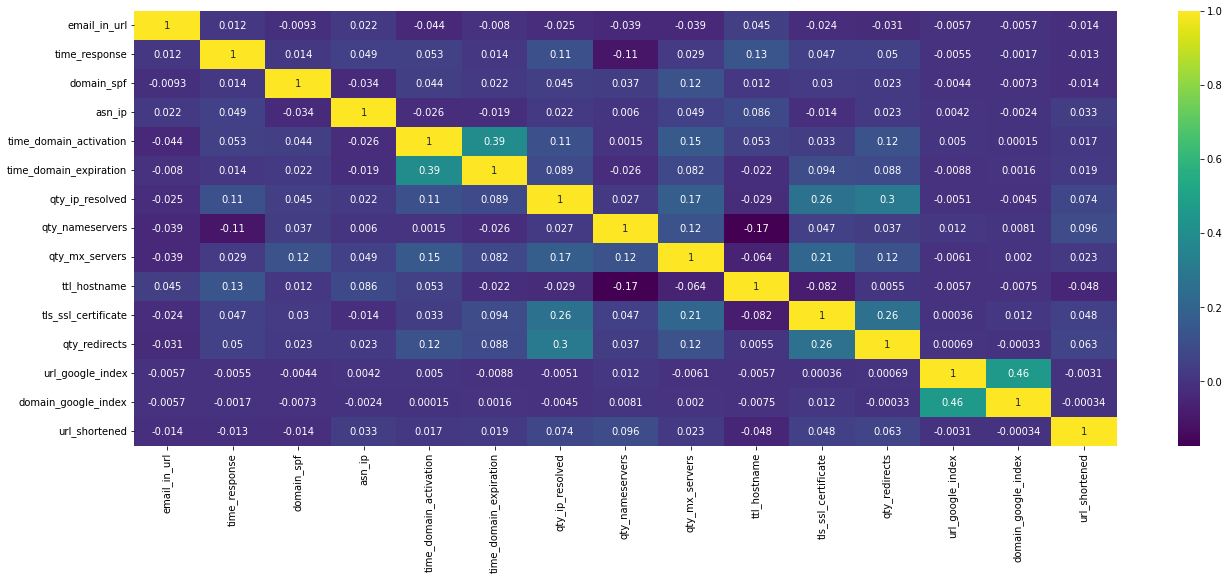

In [44]:
plt.subplots(figsize=(22,8))
sns.heatmap(df[resolve_feat].corr(), annot=True,cmap="viridis");

##### Observation

1. By looking at countplot we can get understand anything and data is alomost equally distributed.
2. In all the countinous variables there are lots of variables

# Feature Engineering and Feature Selection

In [45]:
# Getting all the columns which have only one value and will drop all that column
zero_value_feat = [feat for feat in df.columns if len(df[feat].value_counts())==1]

In [46]:
df[zero_value_feat].shape

(58645, 13)

In [47]:
for feat in zero_value_feat:
    print("Value counts of--",feat,"-- is equal to zero =",df[feat].value_counts().index[0])

Value counts of-- qty_slash_domain -- is equal to zero = 0
Value counts of-- qty_questionmark_domain -- is equal to zero = 0
Value counts of-- qty_equal_domain -- is equal to zero = 0
Value counts of-- qty_and_domain -- is equal to zero = 0
Value counts of-- qty_exclamation_domain -- is equal to zero = 0
Value counts of-- qty_space_domain -- is equal to zero = 0
Value counts of-- qty_tilde_domain -- is equal to zero = 0
Value counts of-- qty_comma_domain -- is equal to zero = 0
Value counts of-- qty_plus_domain -- is equal to zero = 0
Value counts of-- qty_asterisk_domain -- is equal to zero = 0
Value counts of-- qty_hashtag_domain -- is equal to zero = 0
Value counts of-- qty_dollar_domain -- is equal to zero = 0
Value counts of-- qty_percent_domain -- is equal to zero = 0


In [48]:
df.drop(zero_value_feat, axis=1, inplace=True)

In [49]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


### As we observed there are lots of variables which is highly correlated so, we will remove all that features


In [50]:
# Checking correlation whichever column is having 80% or above we will remove that columns
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [51]:
X = df.drop("phishing",axis=1)
y = df["phishing"]

In [52]:
a = list(correlation(X,.8))

In [53]:
df.drop(a,axis=1,inplace=True)

In [54]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_questionmark_directory,qty_asterisk_directory,directory_length,qty_hyphen_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_percent_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,3,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,10,0,0,0,0,0,0,0,6,0,0,0,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,7,0,0,0,0,0,0,0,1,0,0,0,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,7,0,0,0,0,0,0,0,13,0,0,0,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,7,0,0,0,0,0,0,0,27,0,0,0,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


#### Now we'll use RobustScaler for handling outliers after that we use standard scaler to preprocess the dataset

In [55]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
X = df.drop("phishing",axis=1)
y = df["phishing"]

In [57]:
robustscale = RobustScaler()

In [58]:
X_robustscaled = robustscale.fit_transform(X)

In [59]:
#spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_robustscaled, y, test_size=0.2, random_state=42)

In [60]:
st_scaler = StandardScaler()

In [61]:
X_train = st_scaler.fit_transform(X_train)
st_scaler.fit(X_test)

StandardScaler()

### Training the model with KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model = KNeighborsClassifier()

In [64]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
model.score(X_test,y_test)

0.8988831102395771

In [66]:
model.score(X_train,y_train)

0.9507843805951062

In [67]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, f1_score, recall_score

In [68]:
y_preds = model.predict(X_test)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5596
           1       0.89      0.92      0.91      6133

    accuracy                           0.90     11729
   macro avg       0.90      0.90      0.90     11729
weighted avg       0.90      0.90      0.90     11729



In [70]:
print(confusion_matrix(y_test, y_preds))

[[4879  717]
 [ 469 5664]]


In [71]:
print("Precision score-",precision_score(y_test,y_preds))
print("F1 score-",f1_score(y_test,y_preds))
print("Recall score-",recall_score(y_test,y_preds),"\n")
print(classification_report(y_test,y_preds))

Precision score- 0.8876351669017395
F1 score- 0.9052261467156784
Recall score- 0.9235284526332953 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5596
           1       0.89      0.92      0.91      6133

    accuracy                           0.90     11729
   macro avg       0.90      0.90      0.90     11729
weighted avg       0.90      0.90      0.90     11729



In [267]:
#Saving model
import pickle
pickle.dump(model,open("Phishing Detection.pkl","wb"))

In [92]:
len(df.columns)

56

In [93]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_questionmark_directory',
       'qty_asterisk_directory', 'directory_length', 'qty_hyphen_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_percent_params', 'email_in_url',
       'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_exp